In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")

In [3]:
train=pd.read_csv("Train_SU63ISt.csv")
test=pd.read_csv("Test_0qrQsBZ.csv")

In [4]:
train_original=train.copy()
test_original=test.copy()

In [5]:
train.columns,test.columns

(Index(['ID', 'Datetime', 'Count'], dtype='object'),
 Index(['ID', 'Datetime'], dtype='object'))

In [6]:
train.dtypes,test.dtypes

(ID           int64
 Datetime    object
 Count        int64
 dtype: object,
 ID           int64
 Datetime    object
 dtype: object)

In [8]:
train.shape,test.shape

((18288, 3), (5112, 2))

In [18]:
train['Datetime']=pd.to_datetime(train.Datetime)
test['Datetime']=pd.to_datetime(test.Datetime)

train_original['Datetime']=pd.to_datetime(train_original.Datetime)
test_original['Datetime']=pd.to_datetime(test_original.Datetime)

In [20]:
for i in (train,test,train_original,test_original):
    i['year']=i.Datetime.dt.year
    i['month']=i.Datetime.dt.month
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour

In [23]:
train['day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']

In [27]:
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
        return 1
    else:
        return 0


In [29]:
temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2

In [36]:
train.index=train['Datetime']
df=train.drop('ID',axis=1)
ts=df['Count']

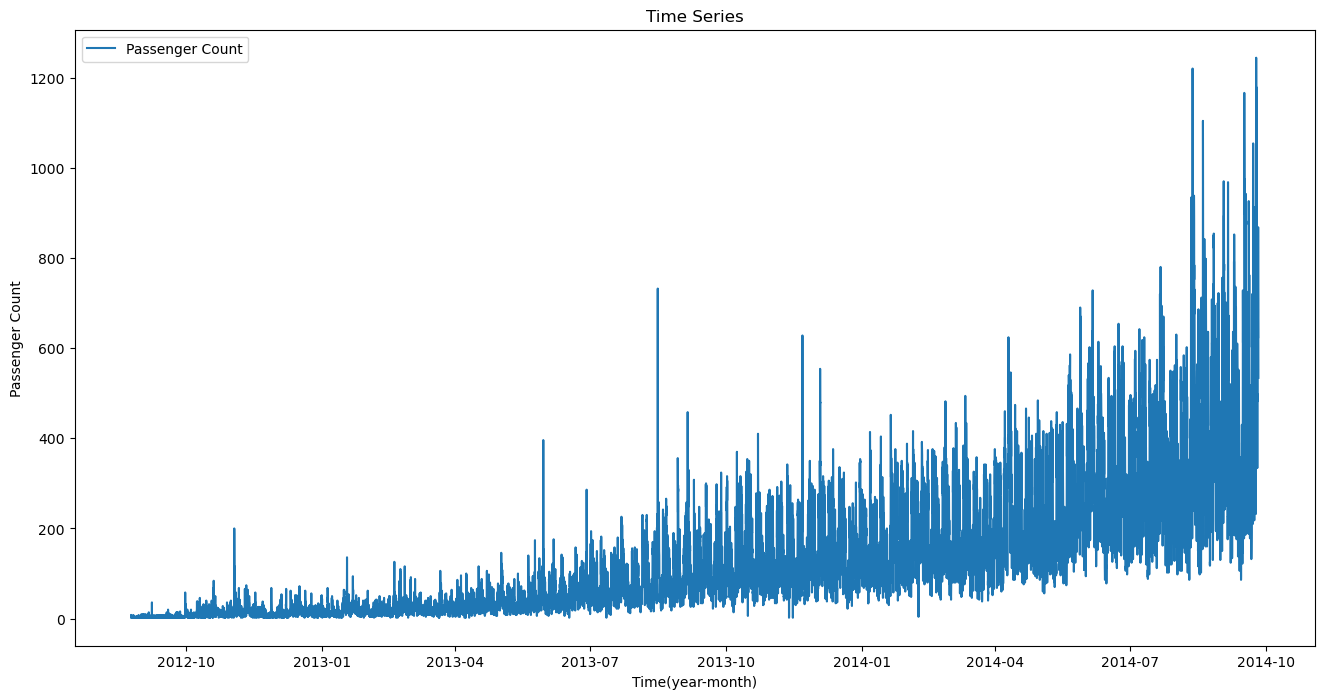

In [39]:
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passenger Count')
plt.title('Time Series')
plt.xlabel('Time(year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

<Axes: xlabel='year'>

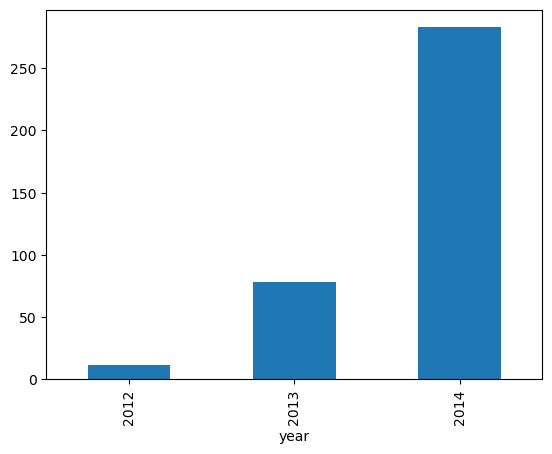

In [47]:
train.groupby('year')['Count'].mean().plot.bar()

<Axes: xlabel='month'>

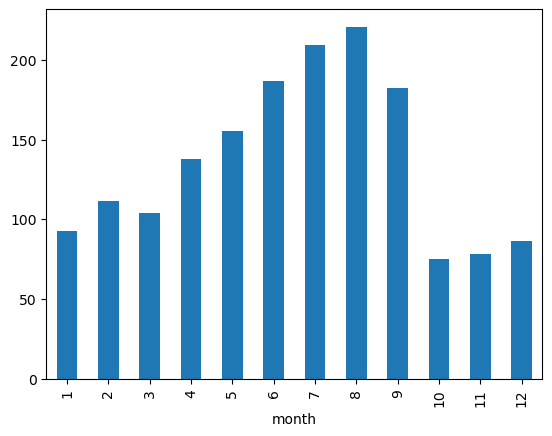

In [48]:
train.groupby('month')['Count'].mean().plot.bar()

In [49]:
temp=train.groupby(['year','month'])['Count'].mean()

<Axes: title={'center': 'Passenger Count(month wise)'}, xlabel='year,month'>

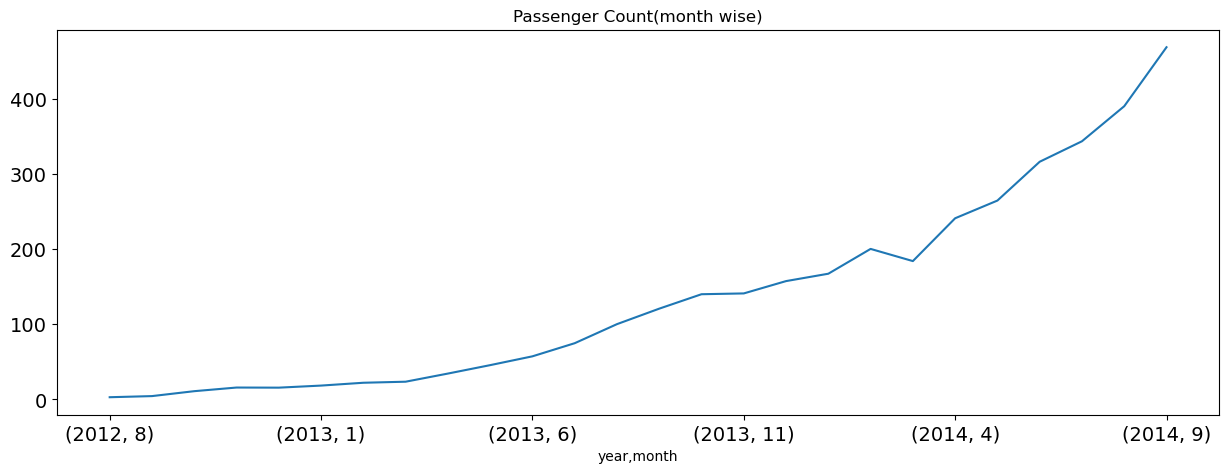

In [52]:
temp.plot(figsize=(15,5),title='Passenger Count(month wise)',fontsize=14)

<Axes: xlabel='day'>

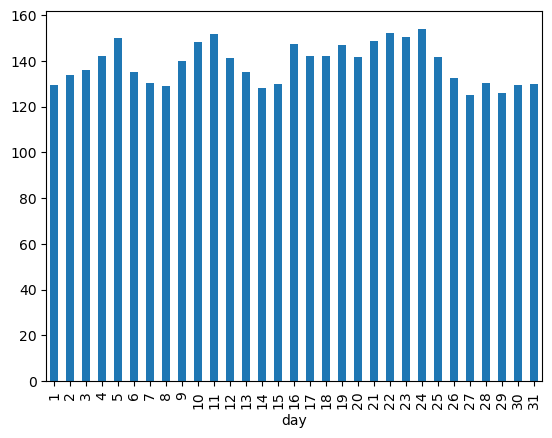

In [53]:
train.groupby('day')['Count'].mean().plot.bar()

<Axes: xlabel='Hour'>

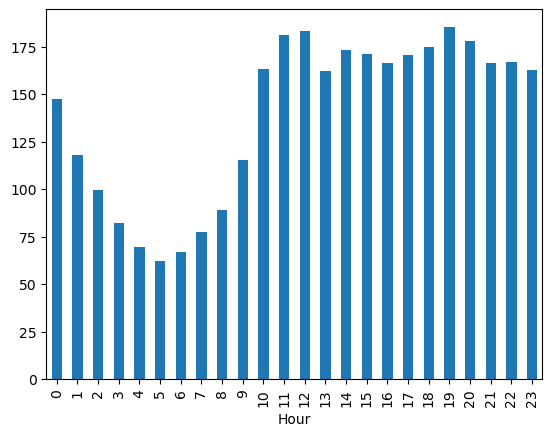

In [54]:
train.groupby('Hour')['Count'].mean().plot.bar()

<Axes: xlabel='weekend'>

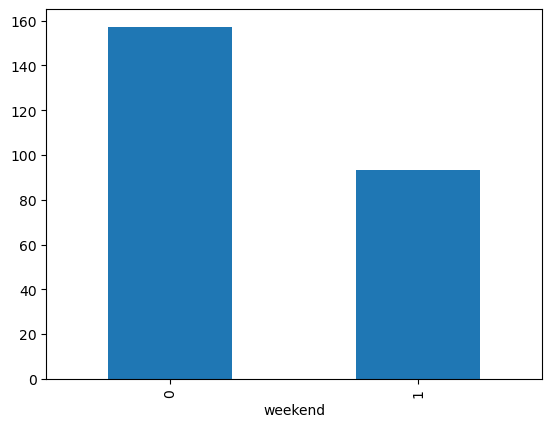

In [55]:
train.groupby('weekend')['Count'].mean().plot.bar()

<Axes: xlabel='day of week'>

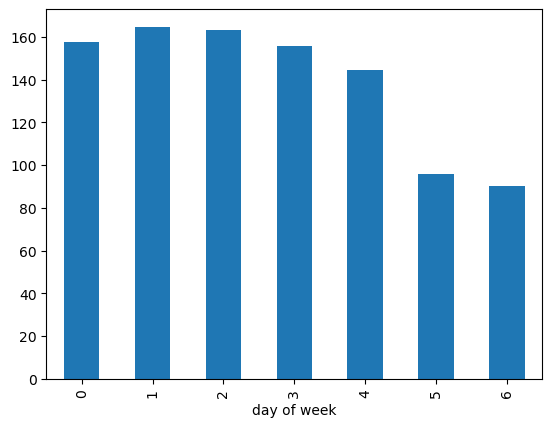

In [56]:
train.groupby('day of week')['Count'].mean().plot.bar()

In [58]:
train=train.drop('ID',axis=1)

In [59]:
train

Datetime  Count  year  month  day  Hour  \
Datetime                                                                 
2012-08-25 00:00:00 2012-08-25 00:00:00      8  2012      8   25     0   
2012-08-25 01:00:00 2012-08-25 01:00:00      2  2012      8   25     1   
2012-08-25 02:00:00 2012-08-25 02:00:00      6  2012      8   25     2   
2012-08-25 03:00:00 2012-08-25 03:00:00      2  2012      8   25     3   
2012-08-25 04:00:00 2012-08-25 04:00:00      2  2012      8   25     4   
...                                 ...    ...   ...    ...  ...   ...   
2014-09-25 19:00:00 2014-09-25 19:00:00    868  2014      9   25    19   
2014-09-25 20:00:00 2014-09-25 20:00:00    732  2014      9   25    20   
2014-09-25 21:00:00 2014-09-25 21:00:00    702  2014      9   25    21   
2014-09-25 22:00:00 2014-09-25 22:00:00    580  2014      9   25    22   
2014-09-25 23:00:00 2014-09-25 23:00:00    534  2014      9   25    23   

                     day of week  weekend  
Datetime                                   
2012-08-25 00:00:00            5        1  
2012-08-25 01:00:00            5        1  
2012-08-25 02:00:00            5        1  
2012-08-25 03:00:00            5        1  
2012-08-25 04:00:00            5        1  
...                          ...      ...  
2014-09-25 19:00:00            3        0  
2014-09-25 20:00:00            3        0  
2014-09-25 21:00:00            3        0  
2014-09-25 22:00:00            3        0  
2014-09-25 23:00:00            3        0  

[18288 rows x 8 columns]

In [60]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')

In [62]:
train.index=train.Timestamp

In [68]:
#Hourly time series
hourly=train.resample('H').mean()

In [69]:
#converting to daily mean
daily=train.resample('D').mean()

In [70]:
#Converting to weekly mean
weekly=train.resample('W').mean()

In [72]:
#converting to monthly mean
monthly=train.resample('M').mean()

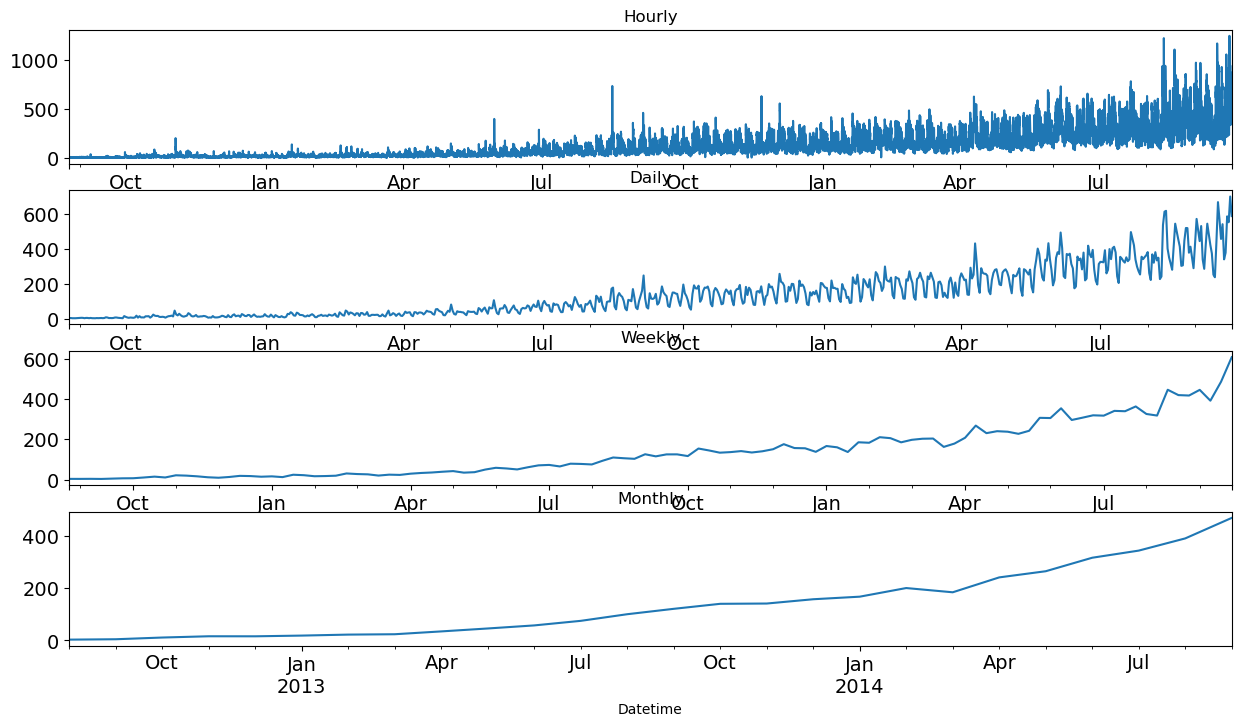

In [82]:
fig,axes=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8),title='Hourly',fontsize=14,ax=axes[0])
daily.Count.plot(figsize=(15,8),title='Daily',fontsize=14,ax=axes[1])
weekly.Count.plot(figsize=(15,8),title='Weekly',fontsize=14,ax=axes[2])
monthly.Count.plot(figsize=(15,8),title='Monthly',fontsize=14,ax=axes[3])

plt.show()

In [85]:
test.Timestamp=pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M')
test.index=test.Timestamp

In [87]:
#Converting to daily mean
test=test.resample('D').mean()

In [92]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp
#converting to daily mean
train=train.resample('D').mean()

In [97]:
Train=train['2012-08-25':'2014-06-24']
valid=train['2014-06-25':'2014-09-25']

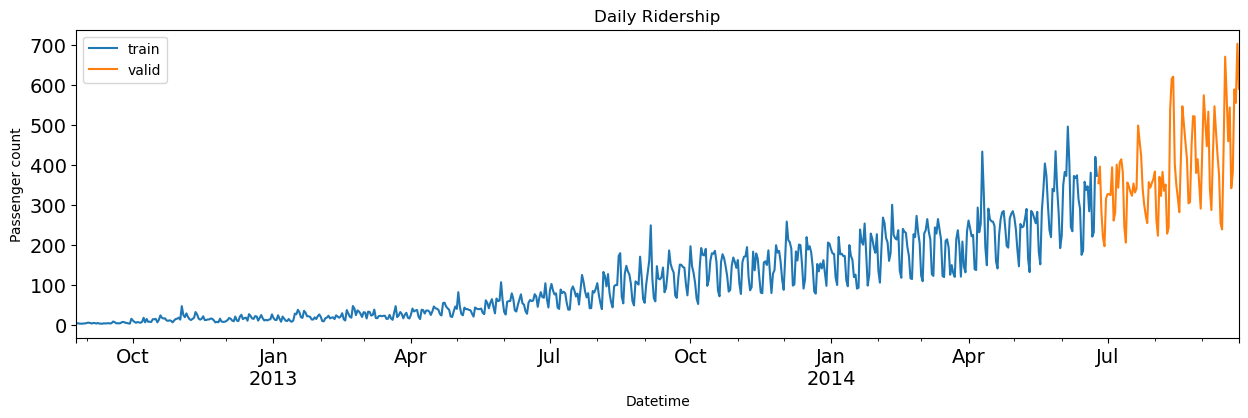

In [102]:
Train.Count.plot(figsize=(15,4),title='Daily Ridership',fontsize=14,label='train')
valid.Count.plot(figsize=(15,4),title='Daily Ridership',fontsize=14,label='valid')
plt.xlabel('Datetime')
plt.ylabel('Passenger count')
plt.legend(loc='best')
plt.show()

## Naive Approach

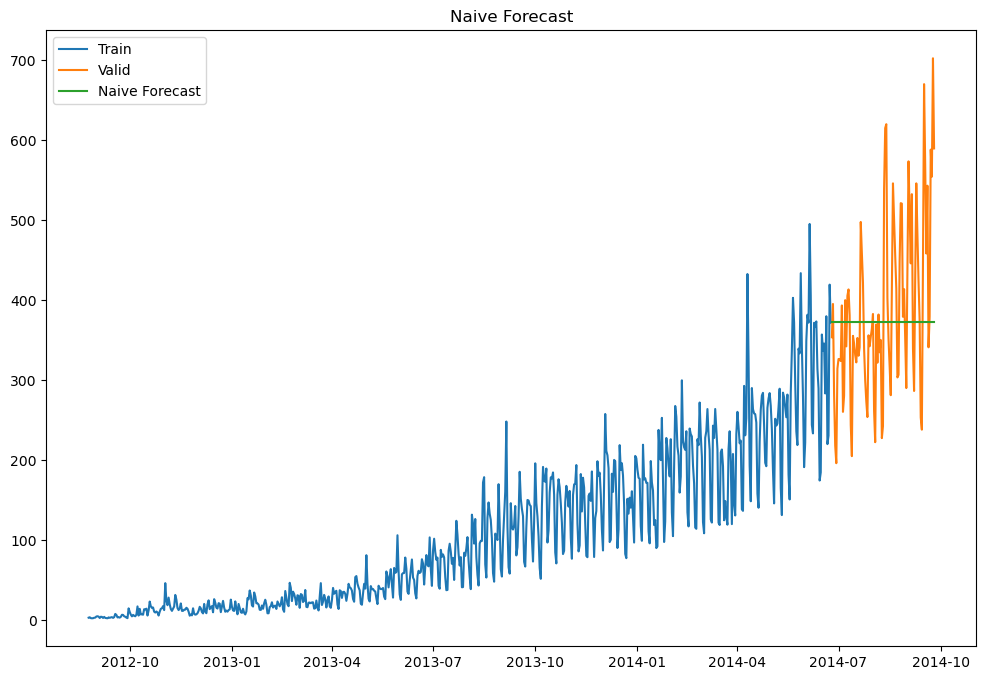

In [104]:
dd=np.asarray(Train.Count)
y_hat=valid.copy()
y_hat['naive']=dd[len(dd)-1]
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='Valid')
plt.plot(y_hat.index,y_hat['naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

In [105]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(valid.Count,y_hat.naive))
print(rms)

111.79050467496724


## Moving Average

In [124]:
y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(10).mean().iloc[-1]

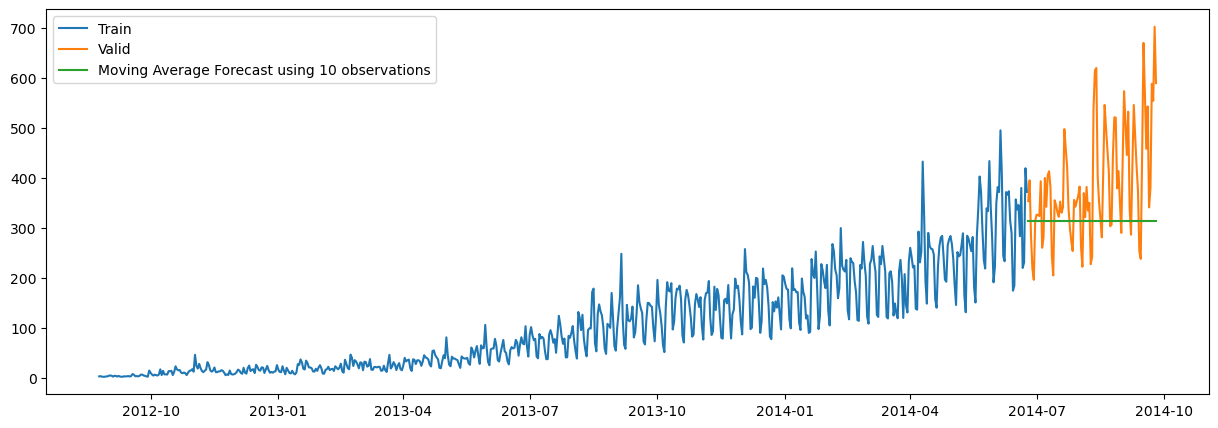

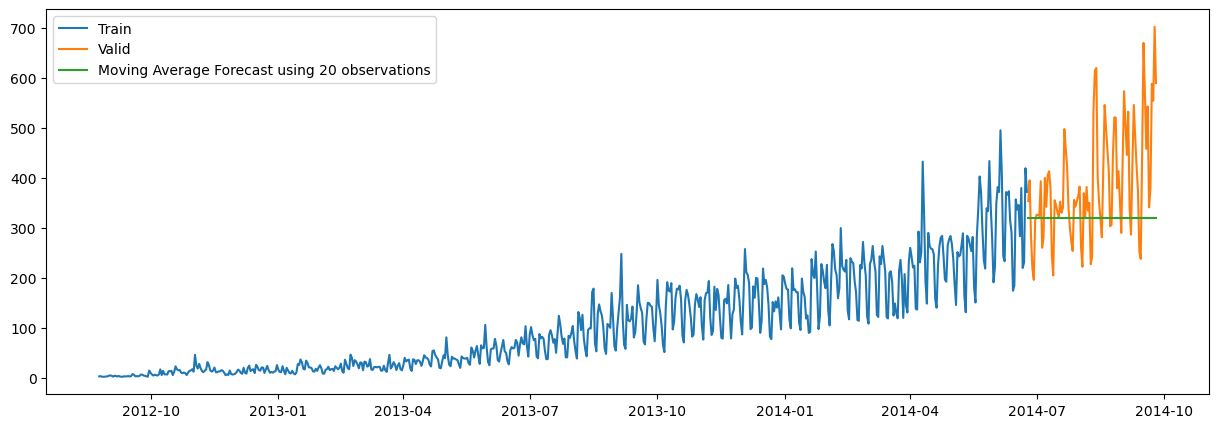

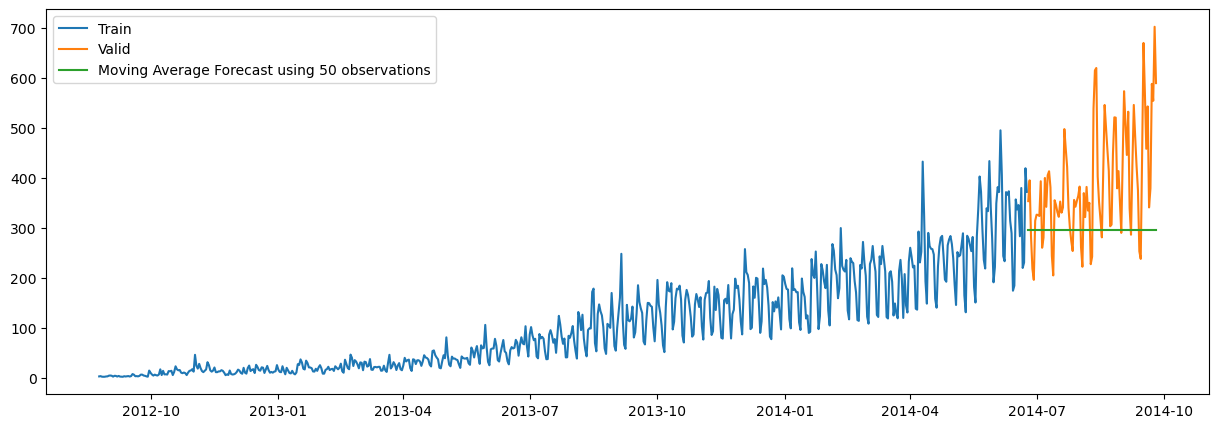

In [128]:
plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()


y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(20).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()


y_hat_avg=valid.copy()
y_hat_avg['moving_avg_forecast']=Train['Count'].rolling(50).mean().iloc[-1]

plt.figure(figsize=(15,5))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'],label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [131]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.moving_avg_forecast))
print(rms)

144.19175679986793


## Simple Exponential Smoothing

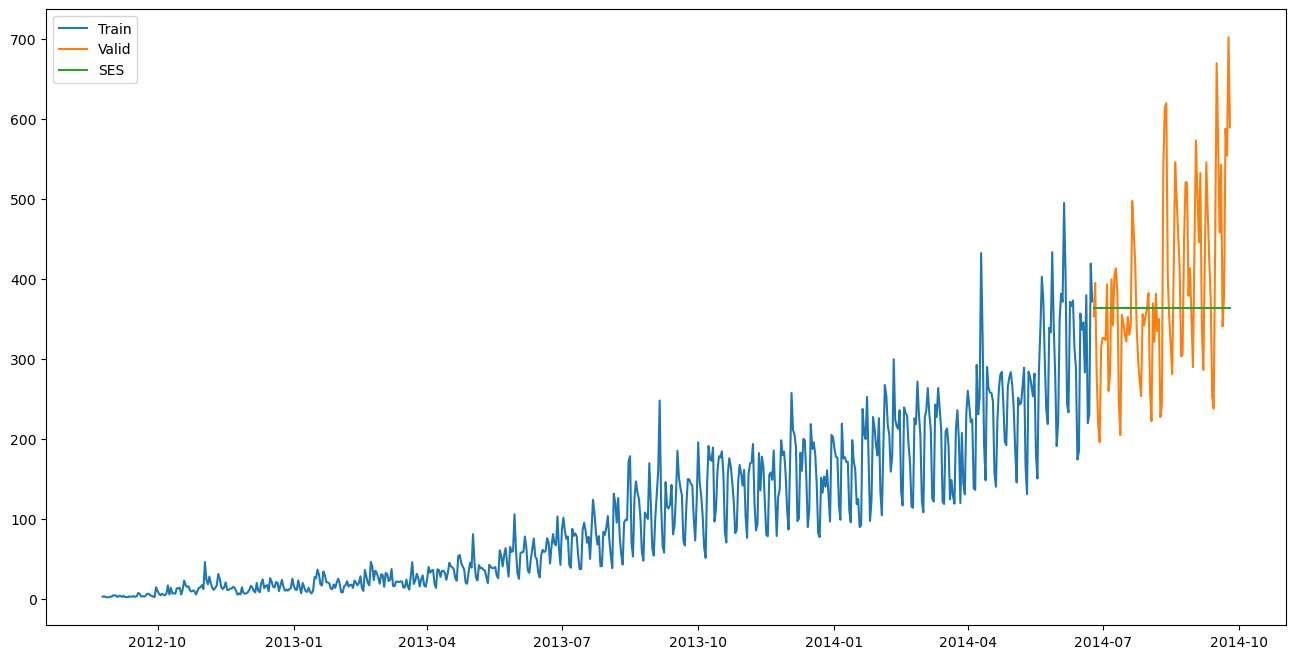

In [132]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing,Holt
y_hat_avg=valid.copy()
fit2=SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES']=fit2.forecast(len(valid))
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['SES'],label='SES')
plt.legend(loc='best')
plt.show()

In [133]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.SES))
print(rms)

113.43708111884514


## Holt's Linear Model

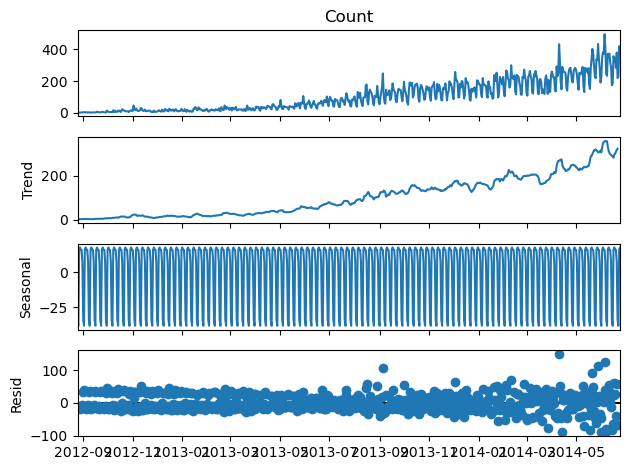

In [164]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(Train.Count).plot()
plt.show()

In [139]:
result=sm.tsa.stattools.adfuller(train.Count)

C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


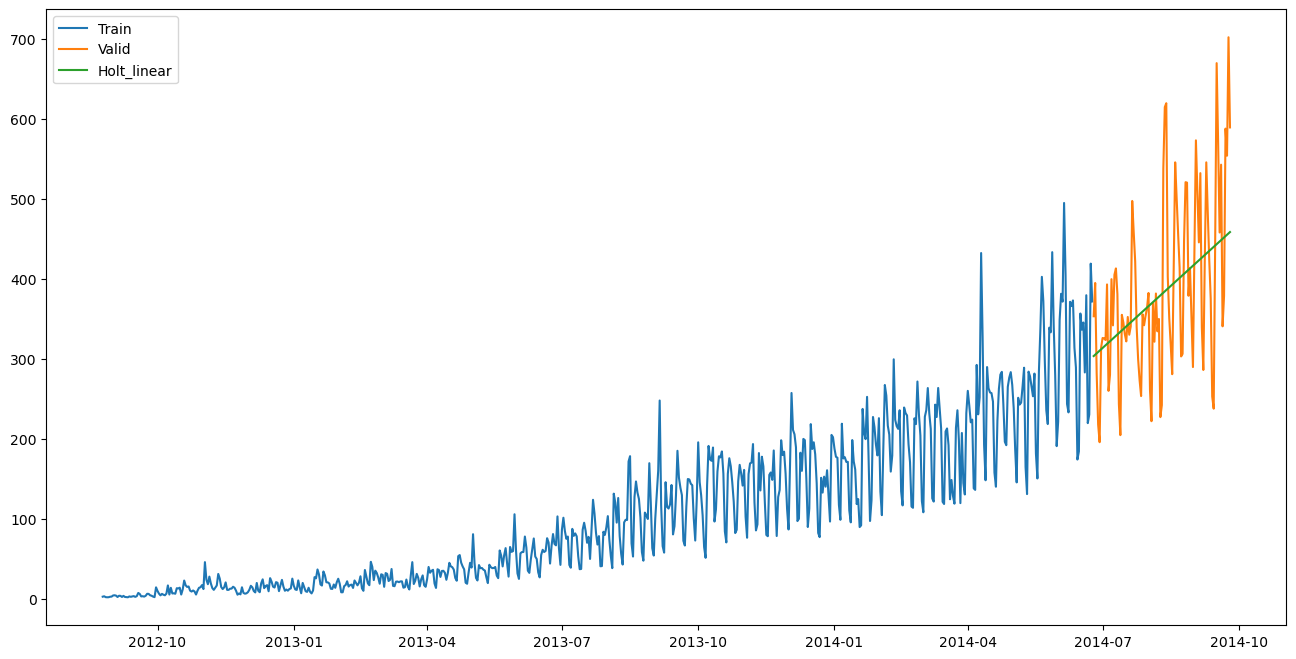

In [199]:
y_hat_avg=valid.copy()
fit1=Holt(np.asarray(Train['Count'])).fit(smoothing_level=0.01,smoothing_slope=0.05)
y_hat_avg['Holt_linear']=fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['Holt_linear'],label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [200]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
print(rms)

95.70576556737473


C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


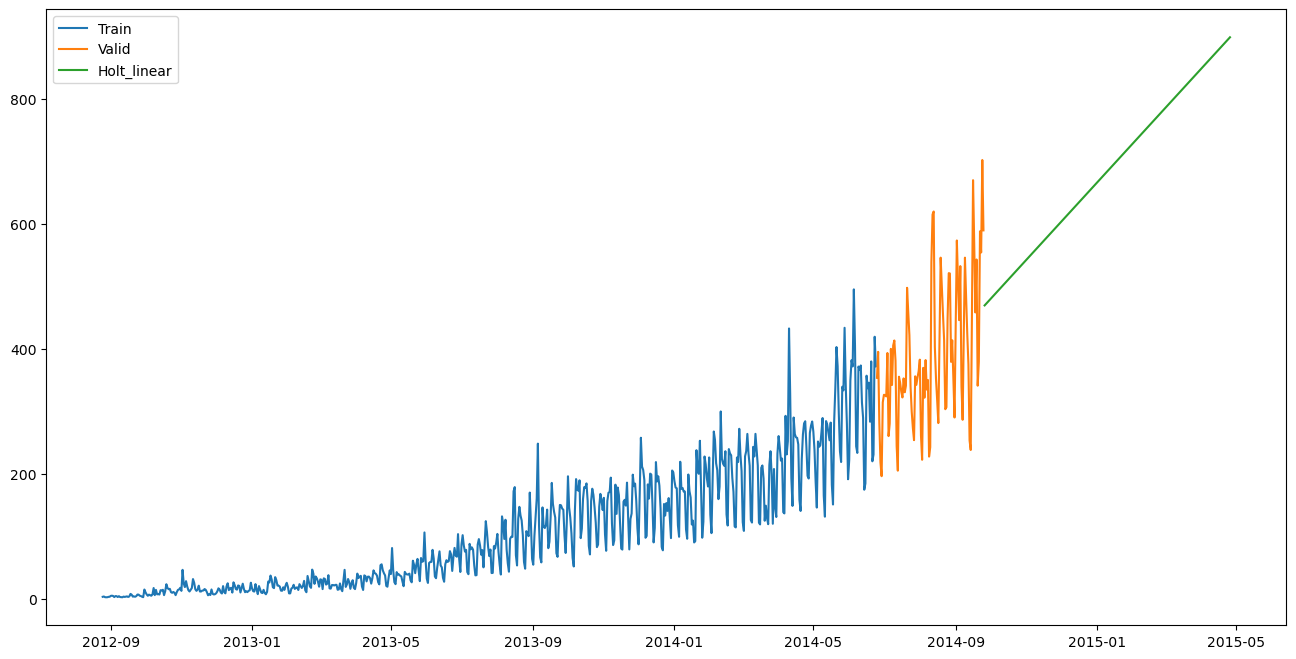

In [243]:
submission=pd.read_csv('sample_submission_LSeus50.csv')
fit1=Holt(np.asarray(train['Count'])).fit(smoothing_level=0.01,smoothing_slope=0.05)
predict=fit1.forecast(len(test))
test['prediction']=predict

plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(test['prediction'],label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [244]:
#hourly ratio of count
train_original['ratio']=train_original['Count']/train_original['Count'].sum()

#Grouping the hourly ratio
temp=train_original.groupby(['Hour'])['ratio'].sum()

#group by csv format
pd.DataFrame(temp,columns=['Hour','ratio']).to_csv('GROUPby.csv')

temp2=pd.read_csv('GROUPby.csv')
temp2=temp2.drop('Hour.1',axis=1,inplace=False)

In [245]:
#Merge test and test_original on day, month and year
merge=pd.merge(test,test_original,on=('day','month','year'),how='left')
merge['Hour']=merge['Hour_y']
merge['ID']=merge['ID_y']
merge=merge.drop(['Datetime_x','year','month','Hour_x','Hour_y','ID_x','ID_y'],axis=1)

In [246]:
#predicting by merging merge and temp2
prediction=pd.merge(merge,temp2,on=('Hour'),how='left')

In [247]:
#converting to the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

In [248]:
submission=prediction.drop(['day','prediction','Datetime_y','Hour','ratio'],axis=1)

In [252]:
pd.DataFrame(submission,columns=['ID','Count']).to_csv('submission.csv')

## Holt Winter

In [254]:
y_hat_avg=valid.copy()
fit1=ExponentialSmoothing(np.asarray(Train['Count']),seasonal_periods=7,trend='add',seasonal='add',).fit()

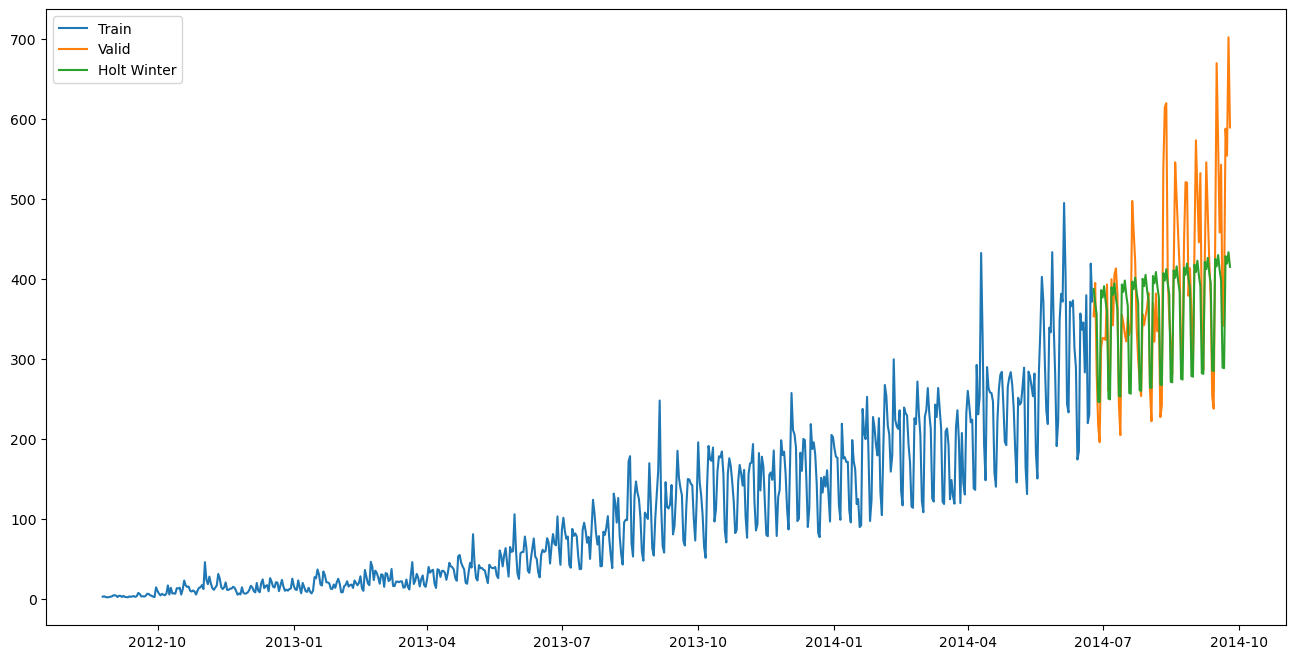

In [265]:
y_hat_avg['Holt_Winter']=fit1.forecast(len(valid))

plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['Holt_Winter'],label='Holt Winter')
plt.legend(loc='best')
plt.show()

In [262]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.Holt_linear))
print(rms)

82.10025140337692


In [263]:
predict=fit1.forecast(len(test))

In [268]:
test['prediction']=predict

#Merge test and test_original on day, month and year
merge=pd.merge(test,test_original,on=('day','month','year'),how='left')
merge['Hour']=merge['Hour_y']
merge['ID']=merge['ID_y']
merge=merge.drop(['Datetime_x','year','month','Hour_x','Hour_y','ID_x','ID_y'],axis=1)

#predicting by merging merge and temp2
prediction=pd.merge(merge,temp2,on=('Hour'),how='left')

#converting to the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

submission=prediction.drop(['day','prediction','Datetime_y','Hour','ratio'],axis=1)
pd.DataFrame(submission,columns=['ID','Count']).to_csv('submission1.csv')

In [269]:
submission

ID       Count
0     18288  412.083324
1     18289  328.864051
2     18290  278.320280
3     18291  229.966104
4     18292  193.563165
...     ...         ...
5107  23395  616.882352
5108  23396  592.802636
5109  23397  553.318535
5110  23398  555.325905
5111  23399  542.199449

[5112 rows x 2 columns]

## ARIMA

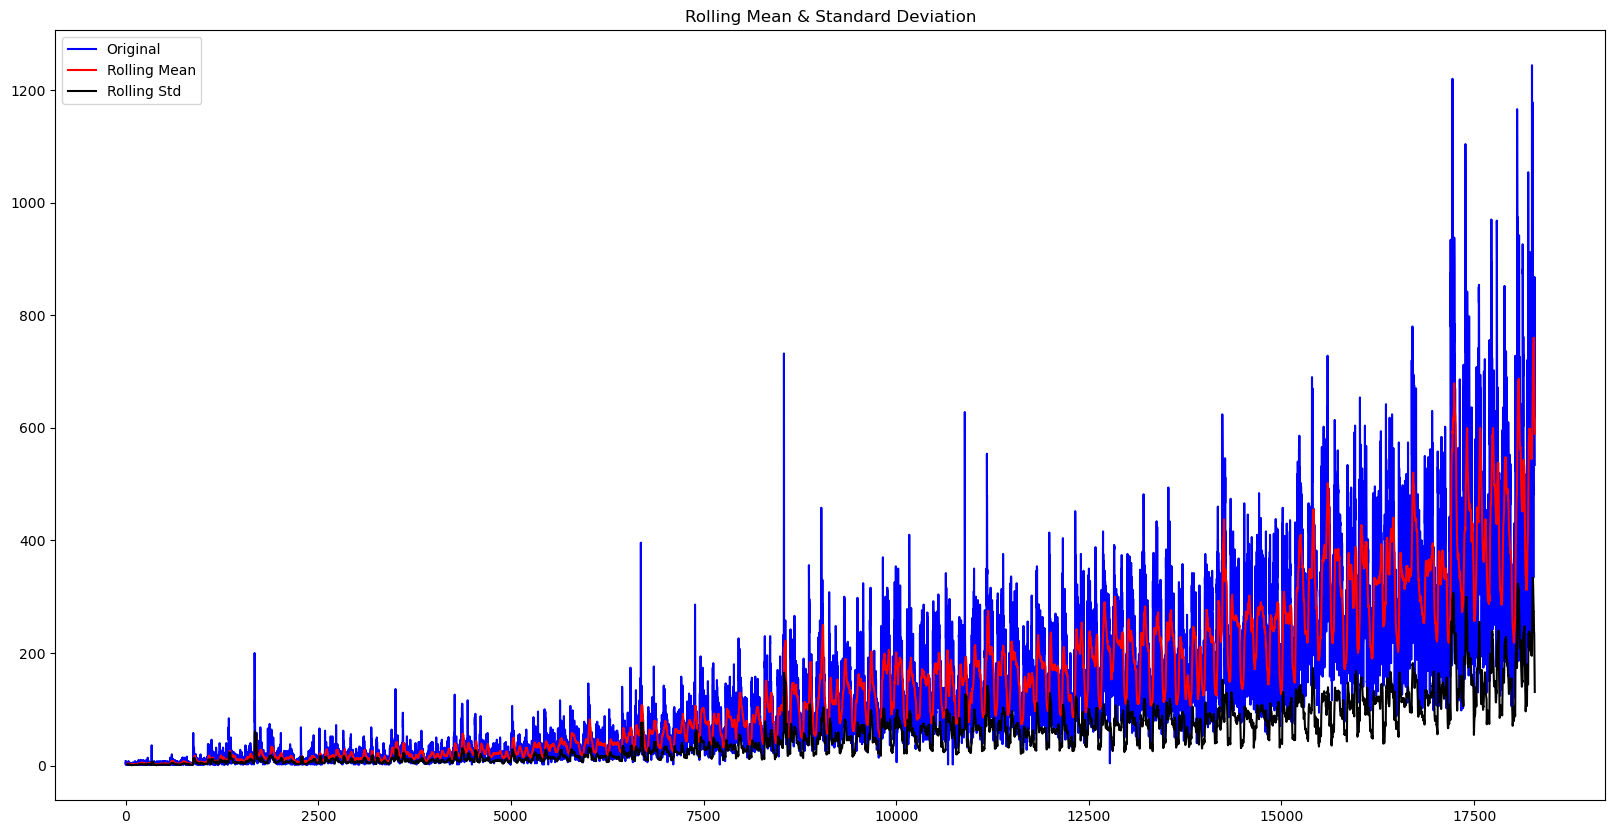

result of dickey fuller test
Test Statistics                  -4.456561
p-value                           0.000235
#Lags Used                       45.000000
Number of Observation Used    18242.000000
Critical Value (1%)              -3.430709
Critical Value (5%)              -2.861698
Critical Value (10%)             -2.566854
dtype: float64


In [271]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #determine rolling statistics
    rolmean=timeseries.rolling(24).mean()
    rolstd=timeseries.rolling(24).std()
    #plot rolling statistics
    orig=plt.plot(timeseries,color='blue',label='Original')
    mean=plt.plot(rolmean,color='red',label='Rolling Mean')
    std=plt.plot(rolstd,color='black',label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #perform dickey-Fuller Test
    print('result of dickey fuller test')
    dftest=adfuller(timeseries,autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['Test Statistics','p-value','#Lags Used','Number of Observation Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]=value
    print(dfoutput)

from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10
test_stationarity(train_original['Count'])

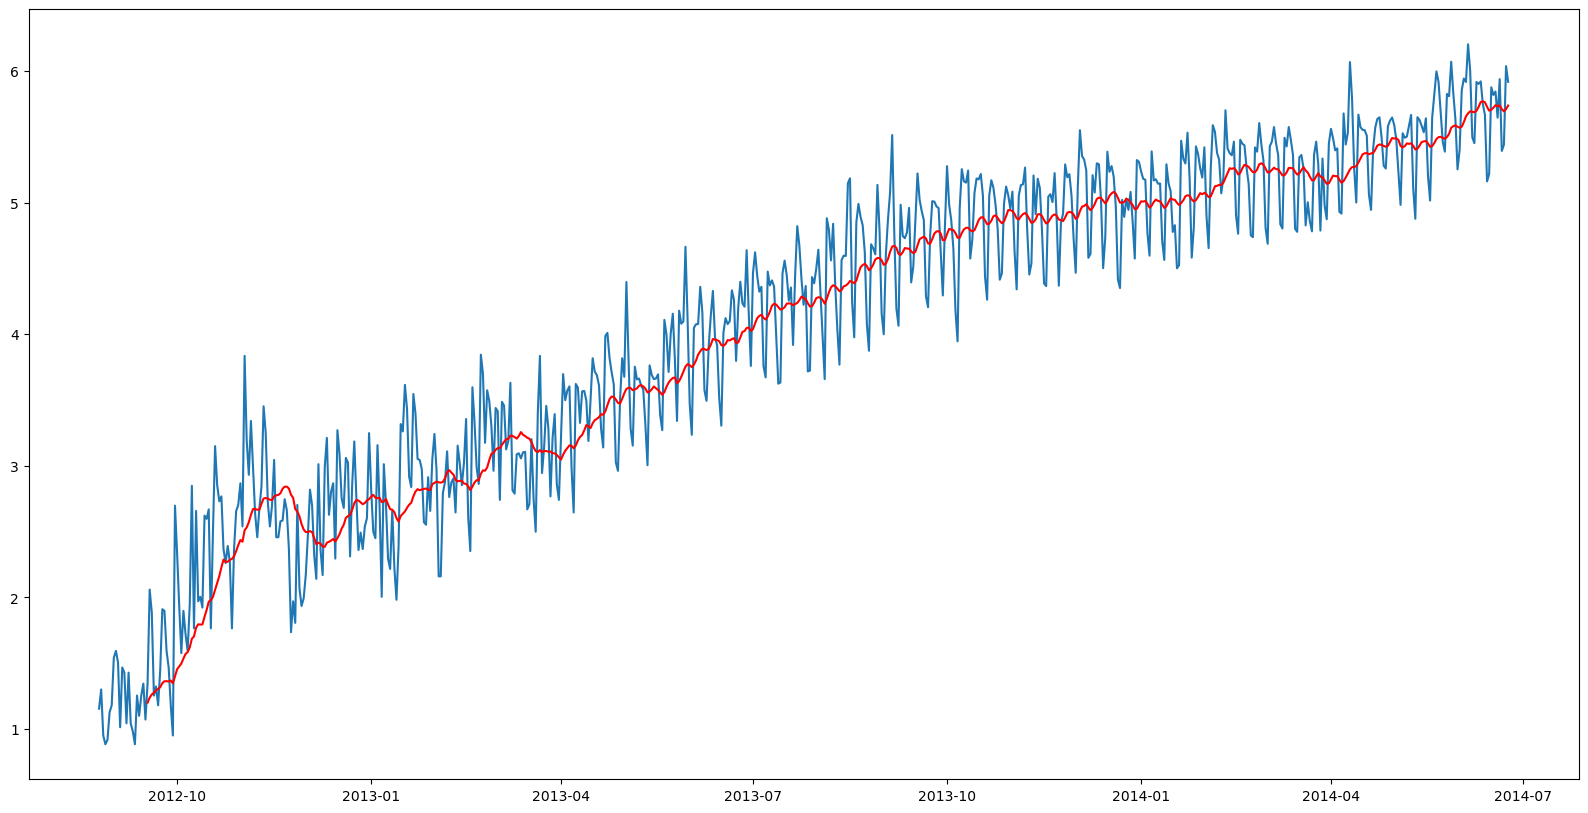

In [273]:
#remove the trend and seasonal

Train_log=np.log(Train['Count'])
valid_log=np.log(valid['Count'])

moving_avg=Train_log.rolling(24).mean()
plt.plot(Train_log)
plt.plot(moving_avg,color='red')
plt.show()

In [274]:
train_log_moving_avg_diff=Train_log-moving_avg

In [286]:
train_log_moving_avg_diff.dropna(inplace=True)

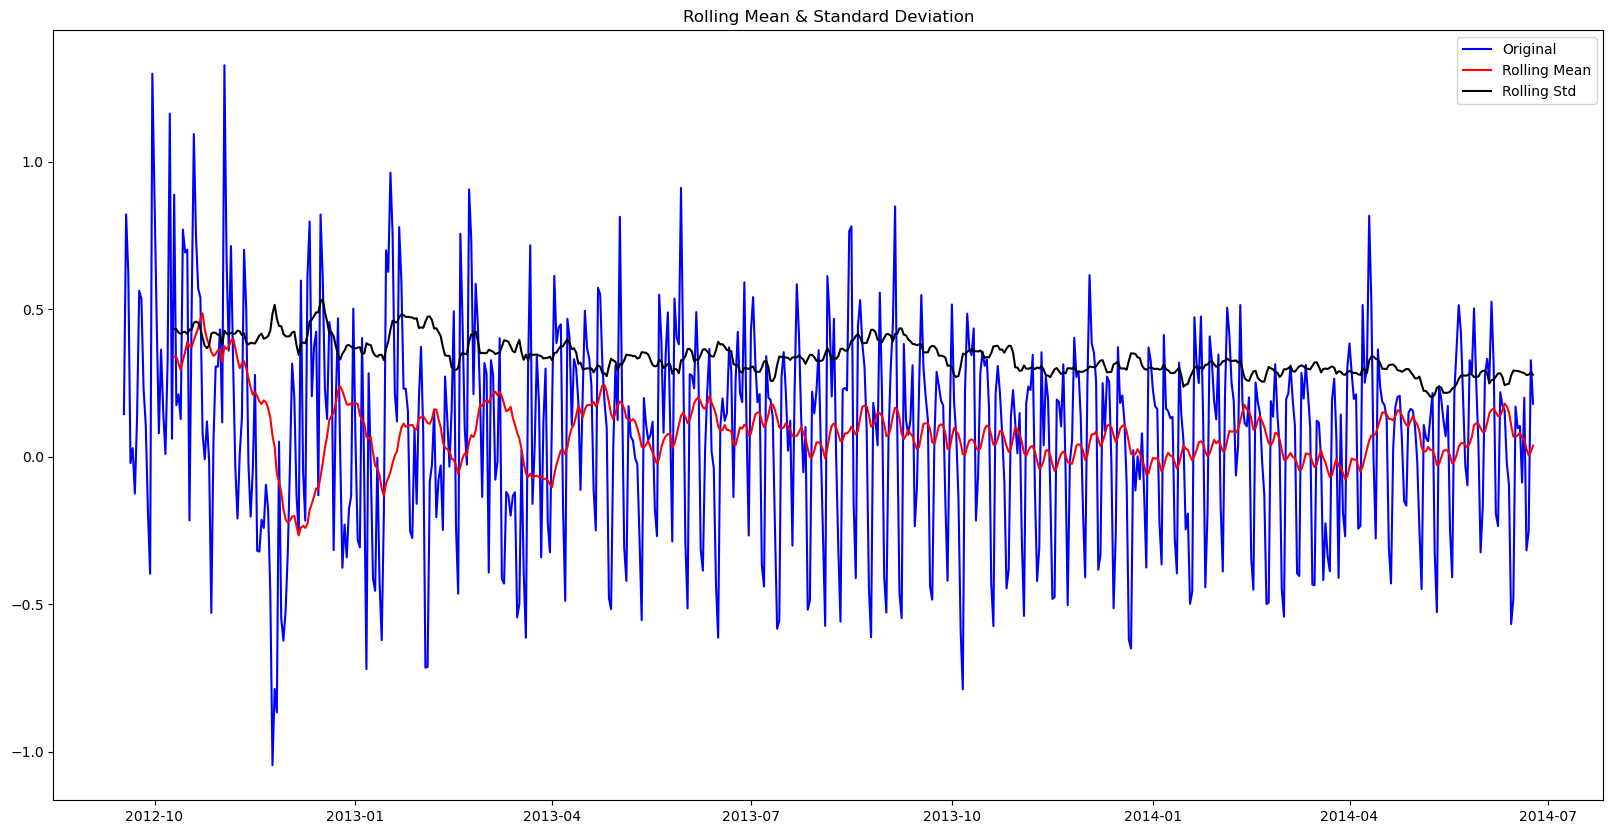

result of dickey fuller test
Test Statistics              -5.861646e+00
p-value                       3.399422e-07
#Lags Used                    2.000000e+01
Number of Observation Used    6.250000e+02
Critical Value (1%)          -3.440856e+00
Critical Value (5%)          -2.866175e+00
Critical Value (10%)         -2.569239e+00
dtype: float64


In [288]:
test_stationarity(train_log_moving_avg_diff)

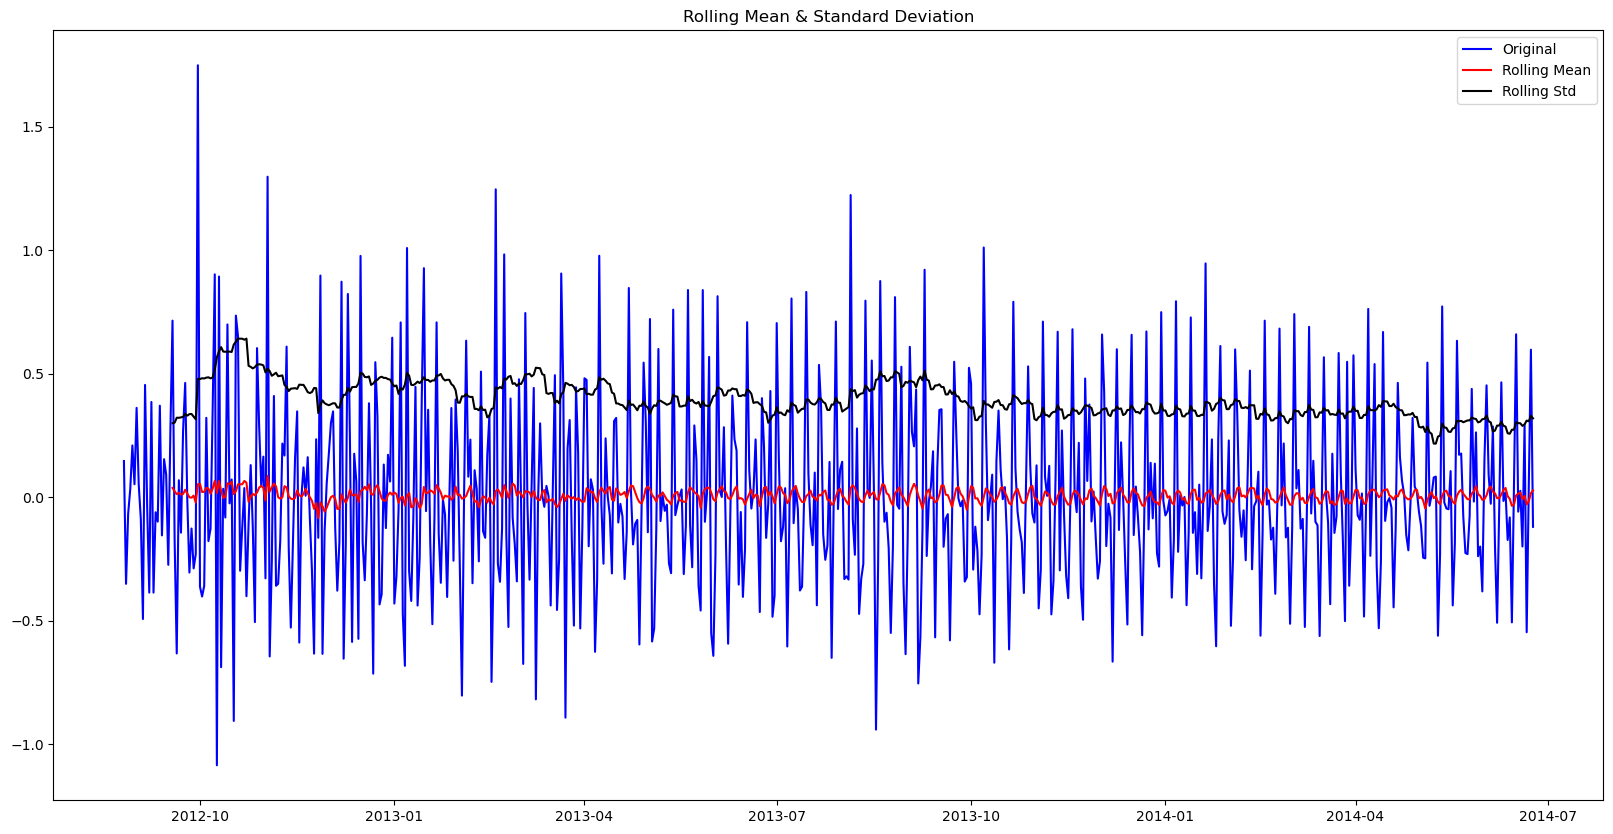

result of dickey fuller test
Test Statistics              -8.237568e+00
p-value                       5.834049e-13
#Lags Used                    1.900000e+01
Number of Observation Used    6.480000e+02
Critical Value (1%)          -3.440482e+00
Critical Value (5%)          -2.866011e+00
Critical Value (10%)         -2.569151e+00
dtype: float64


In [292]:
train_log_diff=Train_log-Train_log.shift(1)
train_log_diff.dropna(inplace=True)
test_stationarity(train_log_diff)

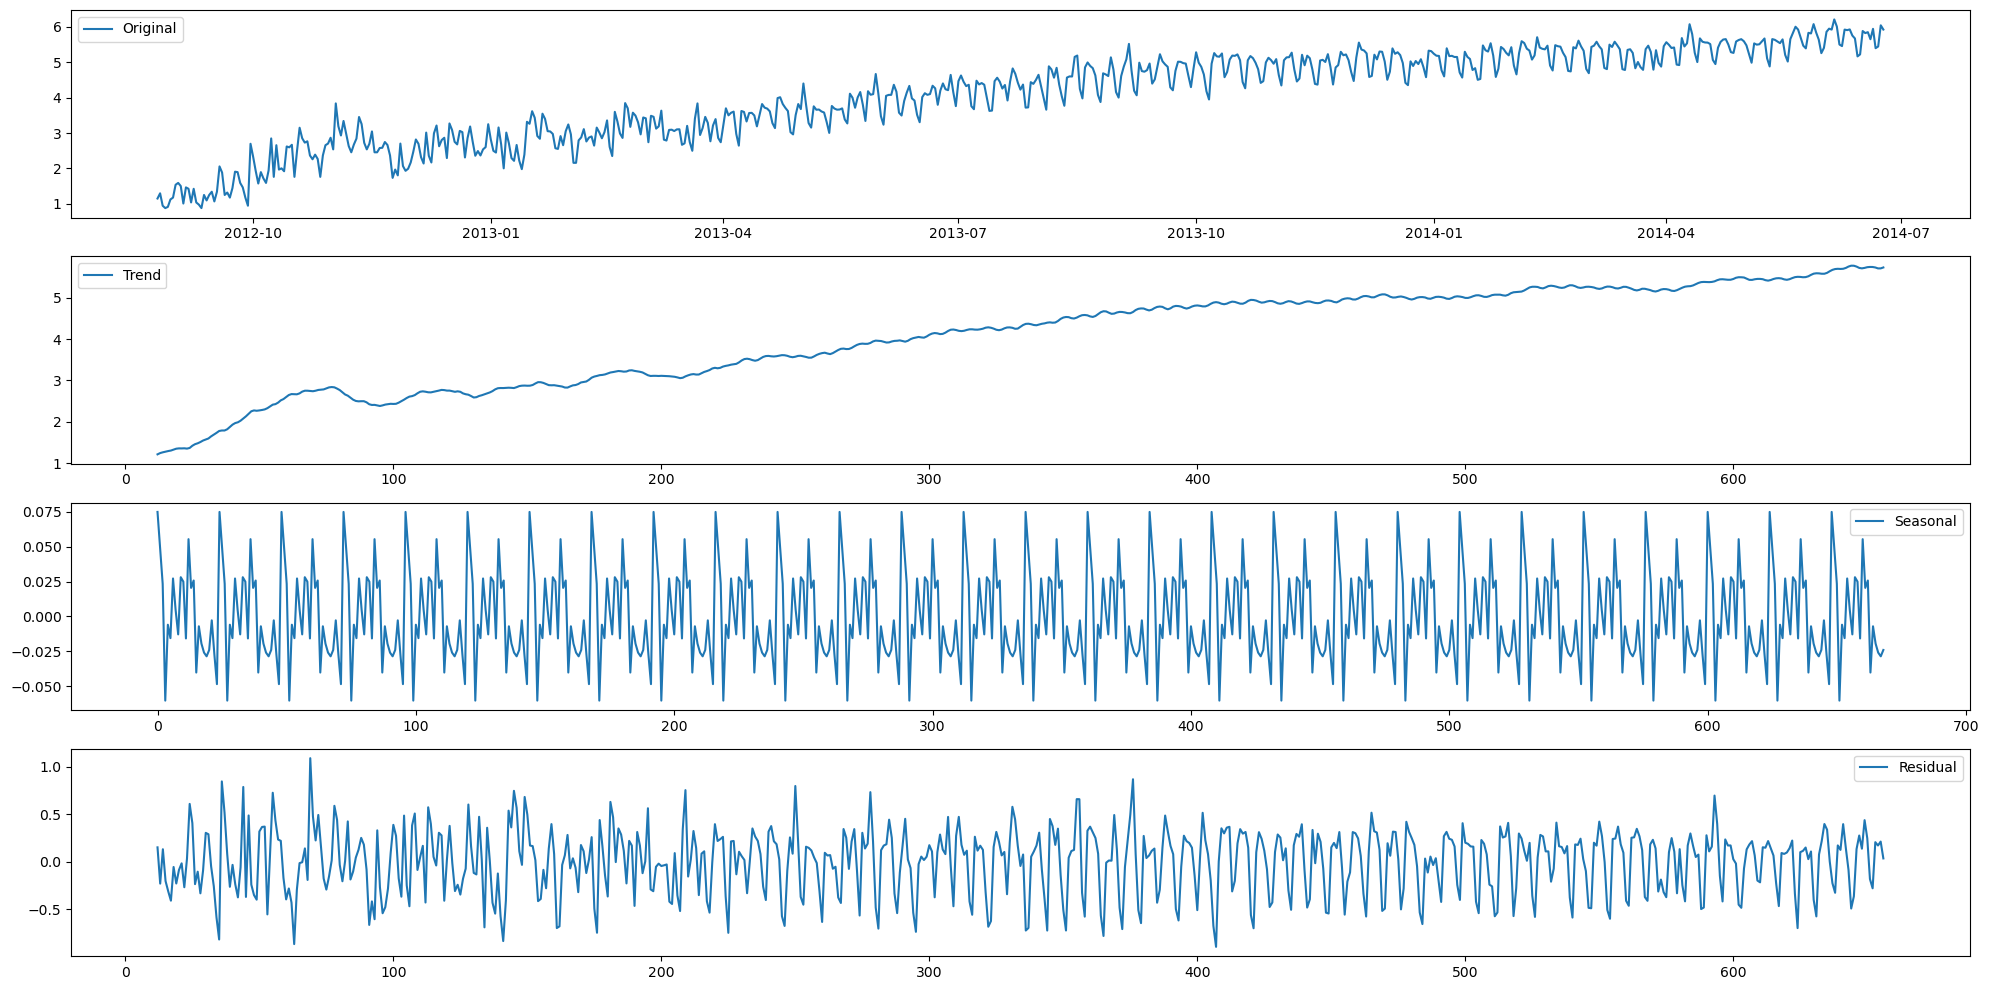

In [302]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(pd.DataFrame(Train_log).Count.values,period=24)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(Train_log,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

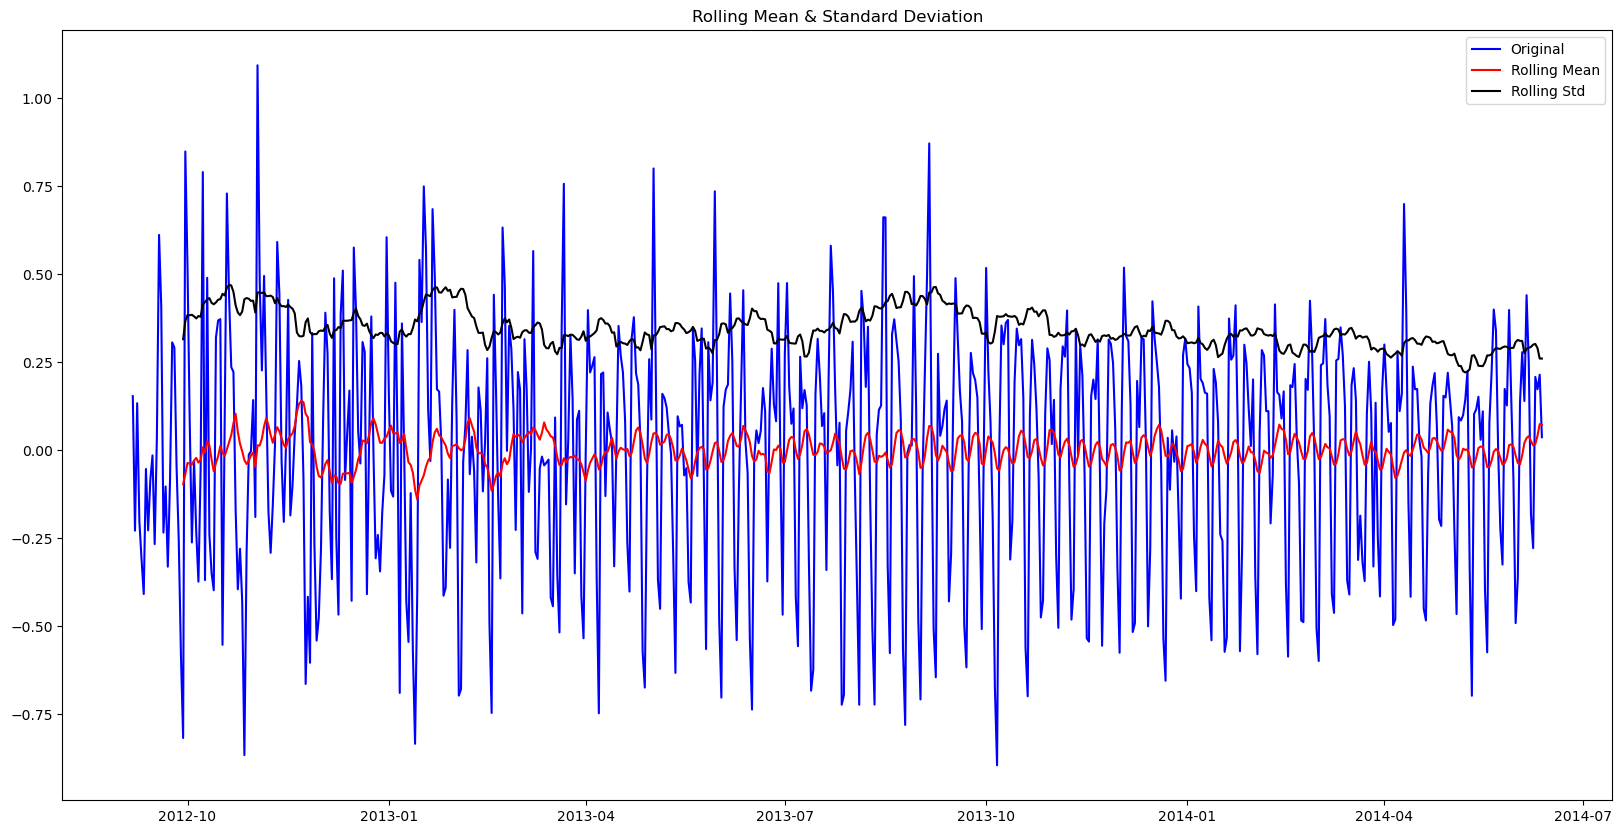

result of dickey fuller test
Test Statistics              -7.822096e+00
p-value                       6.628321e-12
#Lags Used                    2.000000e+01
Number of Observation Used    6.240000e+02
Critical Value (1%)          -3.440873e+00
Critical Value (5%)          -2.866183e+00
Critical Value (10%)         -2.569243e+00
dtype: float64


In [303]:
train_log_decompose=pd.DataFrame(residual)
train_log_decompose['date']=Train_log.index
train_log_decompose.set_index('date',inplace=True)
train_log_decompose.dropna(inplace=True)
test_stationarity(train_log_decompose)

In [305]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(train_log_diff.dropna(),nlags=25)
lag_pacf=pacf(train_log_diff.dropna(),nlags=25,method='ols')

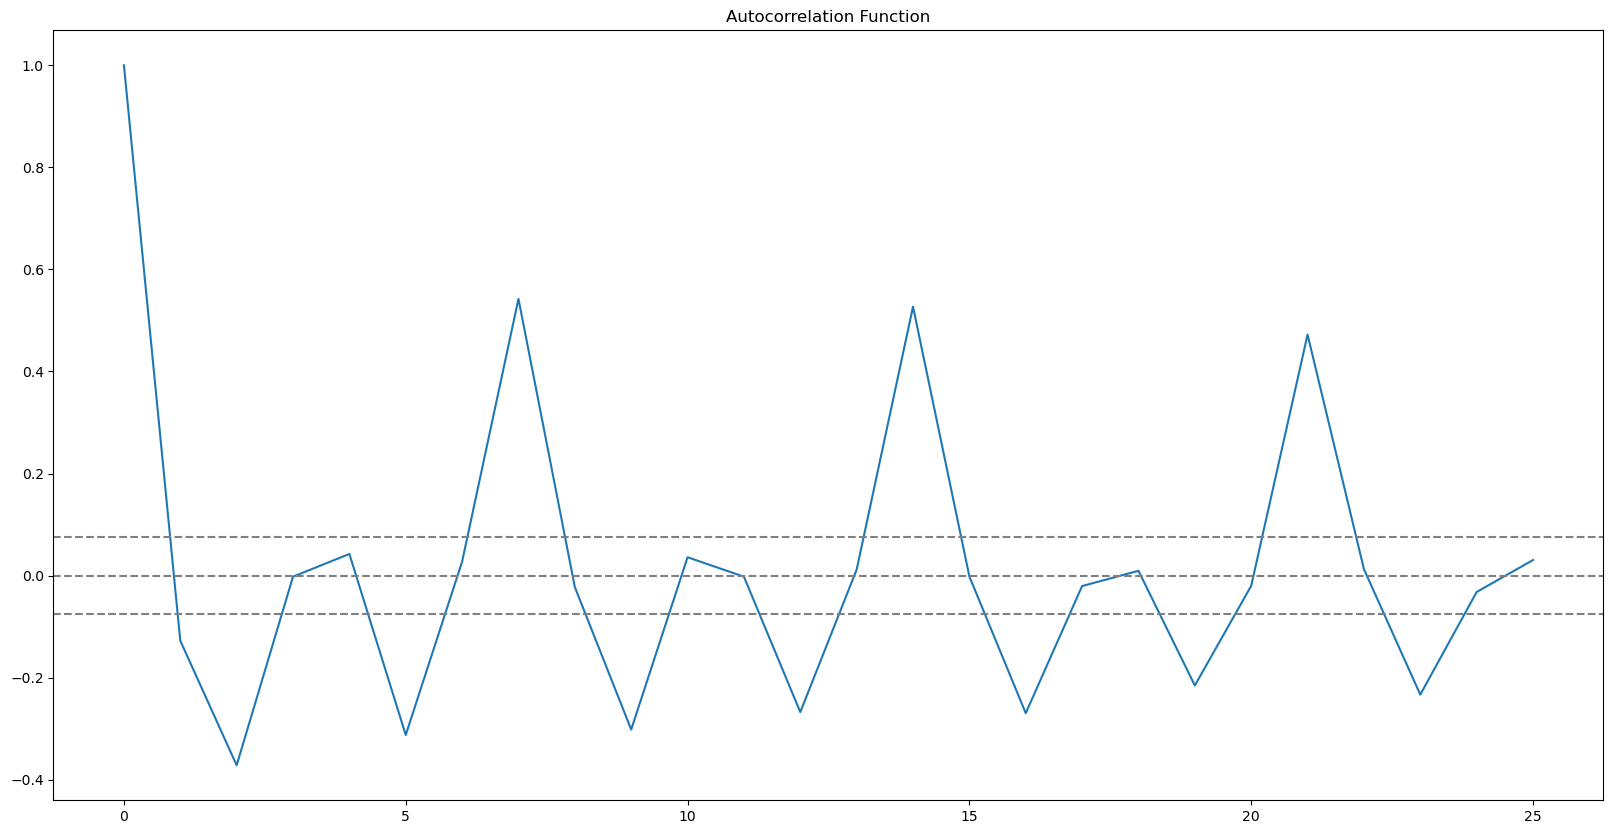

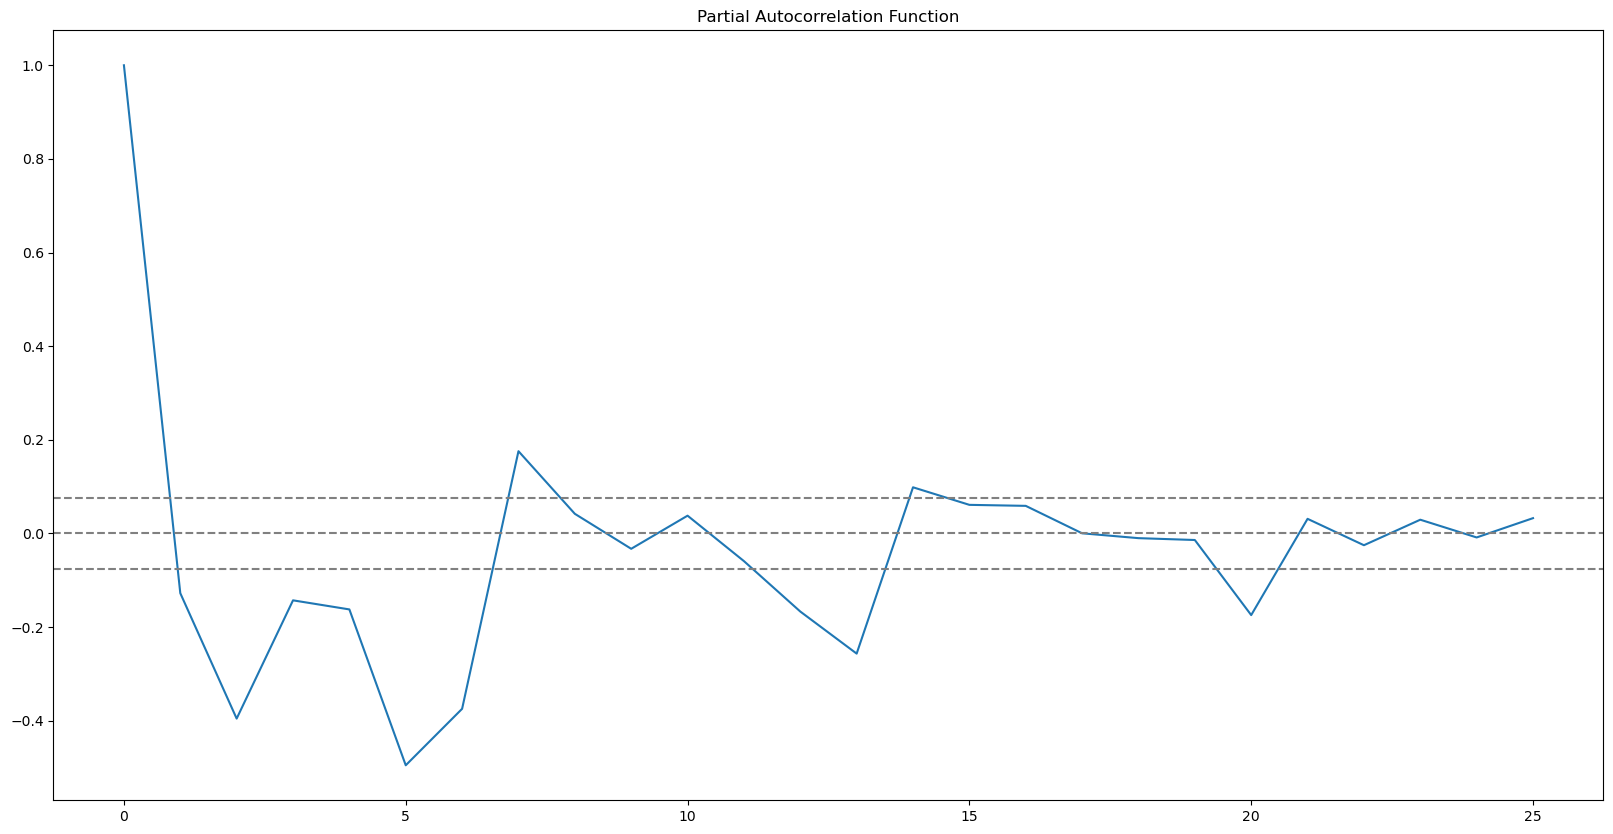

In [307]:
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='grey')
plt.title('Autocorrelation Function')
plt.show()

plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='grey')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='grey')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='grey')
plt.title('Partial Autocorrelation Function')
plt.show()

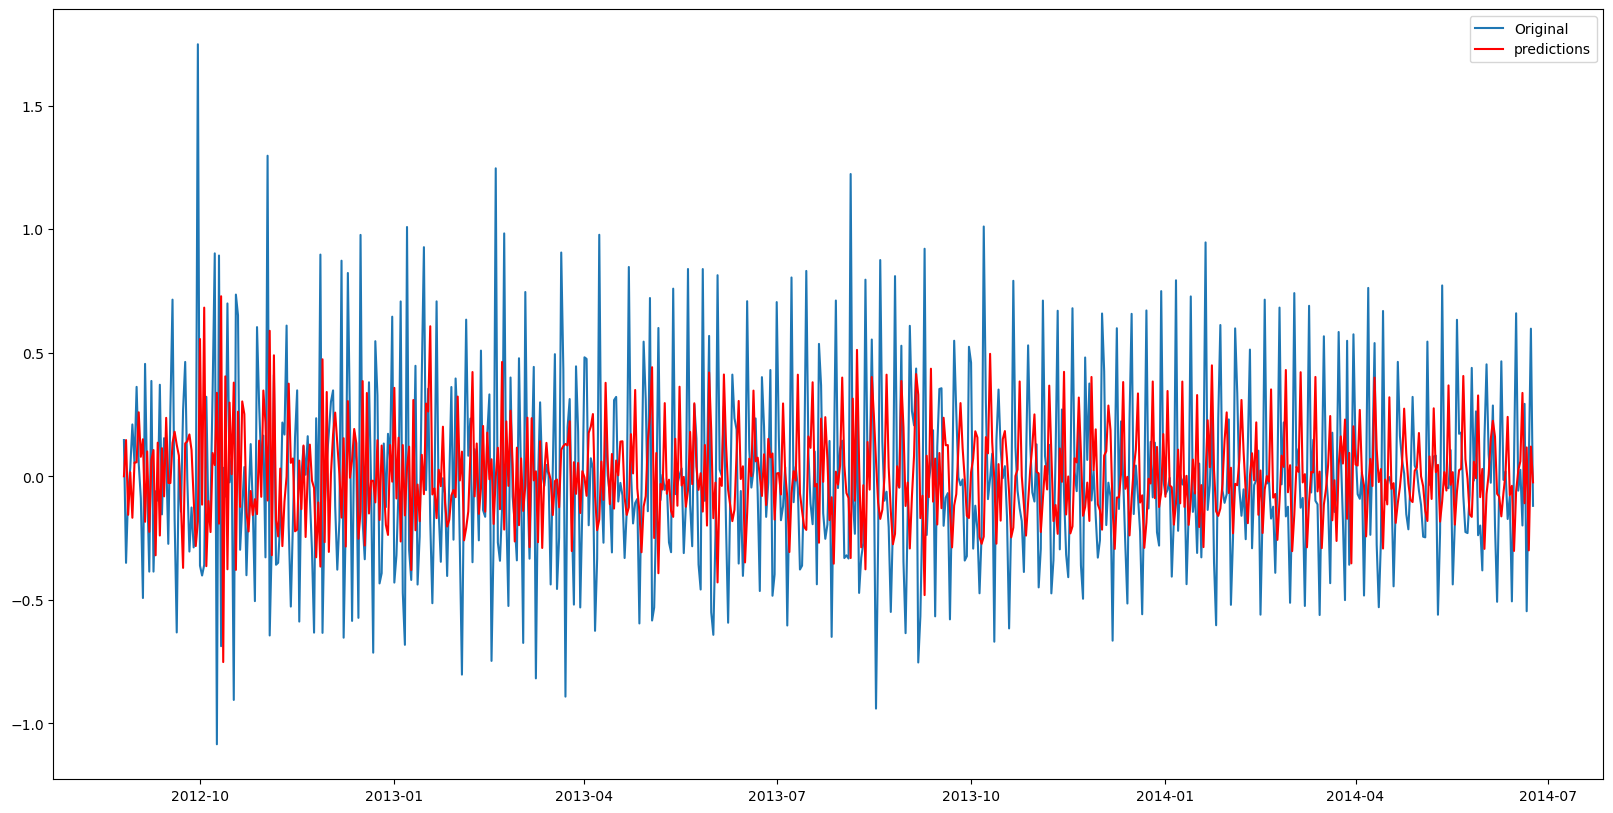

In [411]:
# AR Model
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train_log_diff.dropna(),order=(2,1,0))
result_AR=model.fit()
plt.plot(train_log_diff.dropna(),label='Original')
plt.plot(result_AR.fittedvalues,color='red',label='predictions')
plt.legend(loc='best')
plt.show()

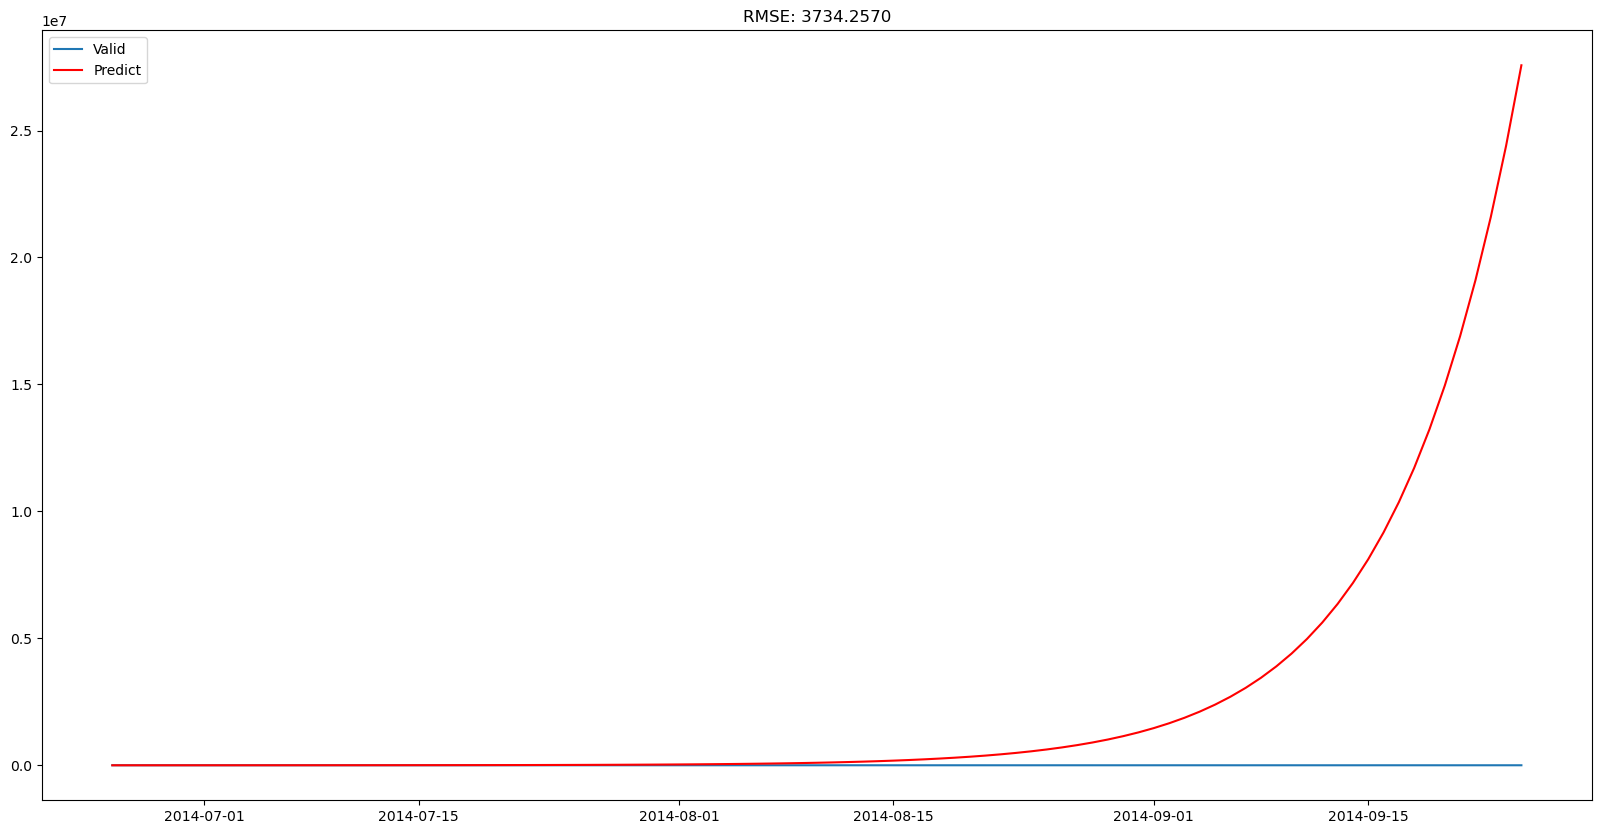

In [416]:
AR_predict=result_AR.predict(start="2014-06-25",end="2014-09-25")
AR_predict=AR_predict.cumsum().shift().fillna(0)
AR_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
AR_predict1=AR_predict1.add(AR_predict,fill_value=0)
AR_predict=np.exp(AR_predict1)

plt.plot(valid['Count'],label='Valid')
plt.plot(AR_predict,color='red',label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'%(np.sqrt(np.dot(AR_predict,valid['Count']))/valid.shape[0]))
plt.show()

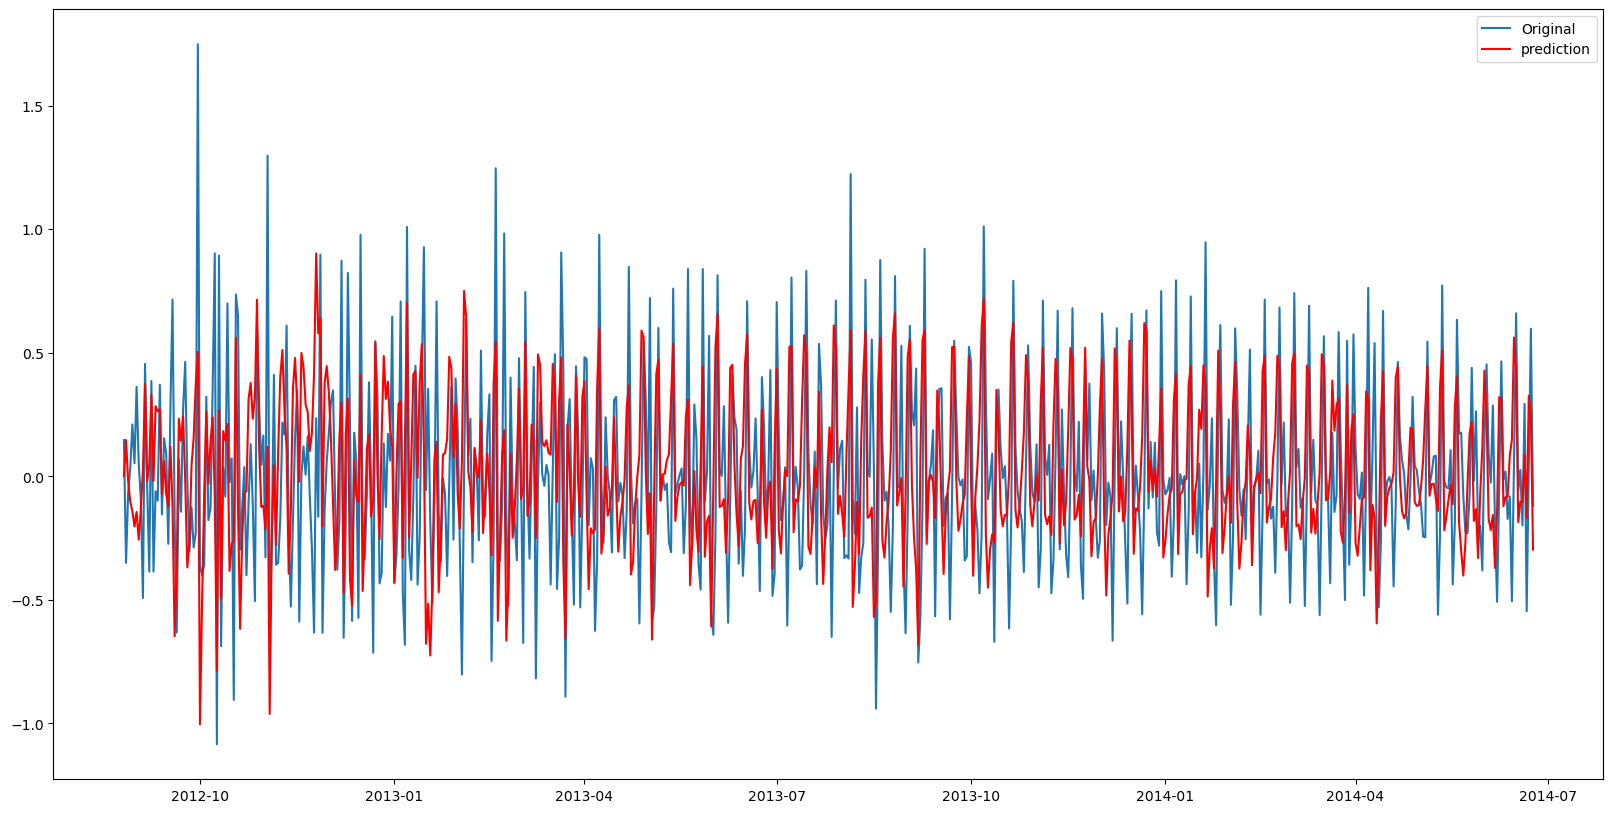

In [413]:
# MA model
model=ARIMA(train_log_diff.dropna(),order=(0,1,2))
result_MA=model.fit()
plt.plot(train_log_diff.dropna(),label='Original')
plt.plot(result_MA.fittedvalues,color='red',label='prediction')
plt.legend(loc='best')
plt.show()

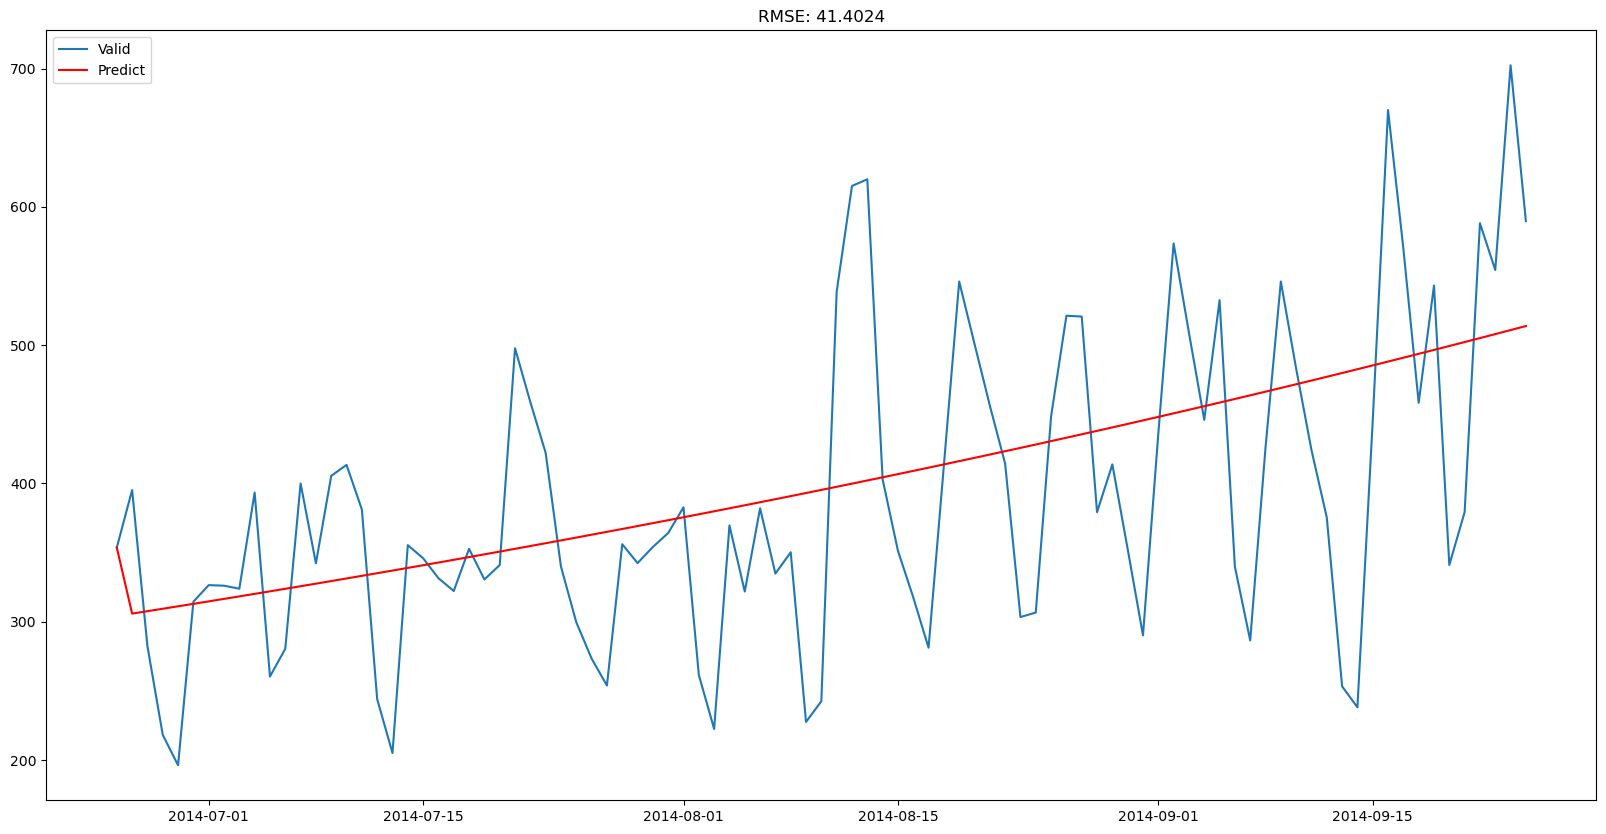

In [417]:
MA_predict=result_MA.predict(start="2014-06-25",end="2014-09-25")
MA_predict=MA_predict.cumsum().shift().fillna(0)
MA_predict1=pd.Series(np.ones(valid.shape[0])*np.log(valid['Count'])[0],index=valid.index)
MA_predict1=MA_predict1.add(MA_predict,fill_value=0)
MA_predict=np.exp(MA_predict1)

plt.plot(valid['Count'],label='Valid')
plt.plot(MA_predict,color='red',label='Predict')
plt.legend(loc='best')
plt.title('RMSE: %.4f'%(np.sqrt(np.dot(MA_predict,valid['Count']))/valid.shape[0]))
plt.show()

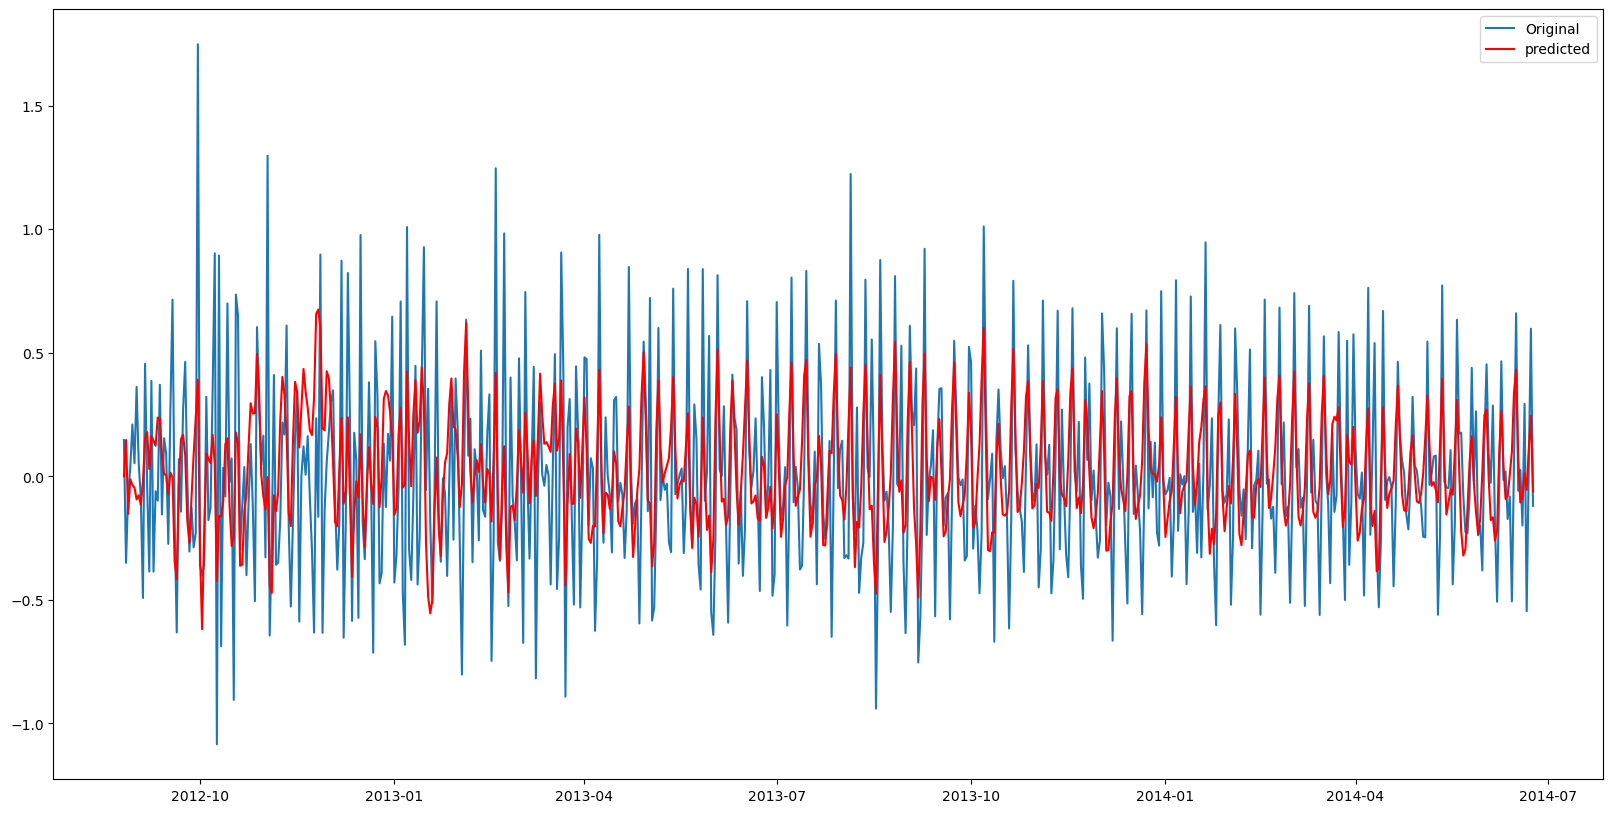

In [415]:
# Combined Model
model=ARIMA(train_log_diff.dropna(),order=(2,1,2))
result_ARIMA=model.fit()
plt.plot(train_log_diff.dropna(),label='Original')
plt.plot(result_ARIMA.fittedvalues,color='red',label='predicted')
plt.legend(loc='best')
plt.show()

In [418]:
def check_prediction_diff(predict_diff,given_set):
    predict_diff=predict_diff.cumsum().shift().fillna(0)
    predict_base=pd.Series(np.ones(given_set.shape[0])*np.log(given_set['Count'])[0],index=given_set.index)
    predict_log=predict_base.add(predict_diff,fill_value=0)
    predict=np.exp(predict_log)
    
    plt.plot(given_set['Count'],label='given set')
    plt.plot(predict,color='red',label='Predict')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'%(np.sqrt(np.dot(predict,given_set['Count']))/given_set.shape[0]))
    plt.show()

def check_prediction_log(predict_log,given_set):
    predict=np.exp(predict_log)
    
    plt.plot(given_set['Count'],label='given set')
    plt.plot(predict,color='red',label='Predict')
    plt.legend(loc='best')
    plt.title('RMSE: %.4f'%(np.sqrt(np.dot(predict,given_set['Count']))/given_set.shape[0]))
    plt.show()

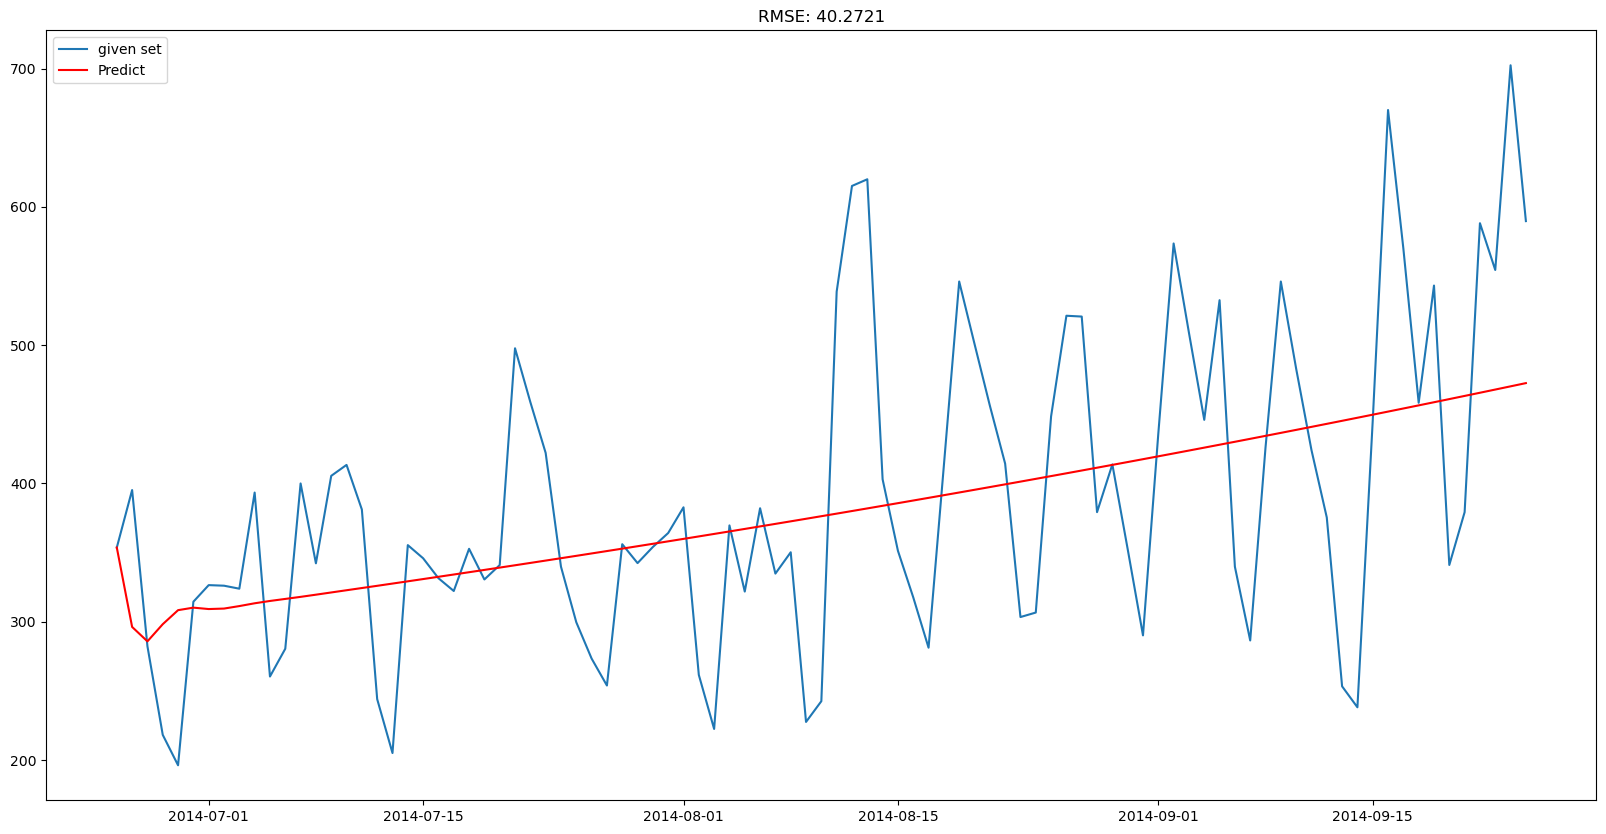

In [419]:
ARIMA_predict_diff=result_ARIMA.predict(start="2014-06-25",end="2014-09-25")
check_prediction_diff(ARIMA_predict_diff,valid)

## SARIMAX

C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


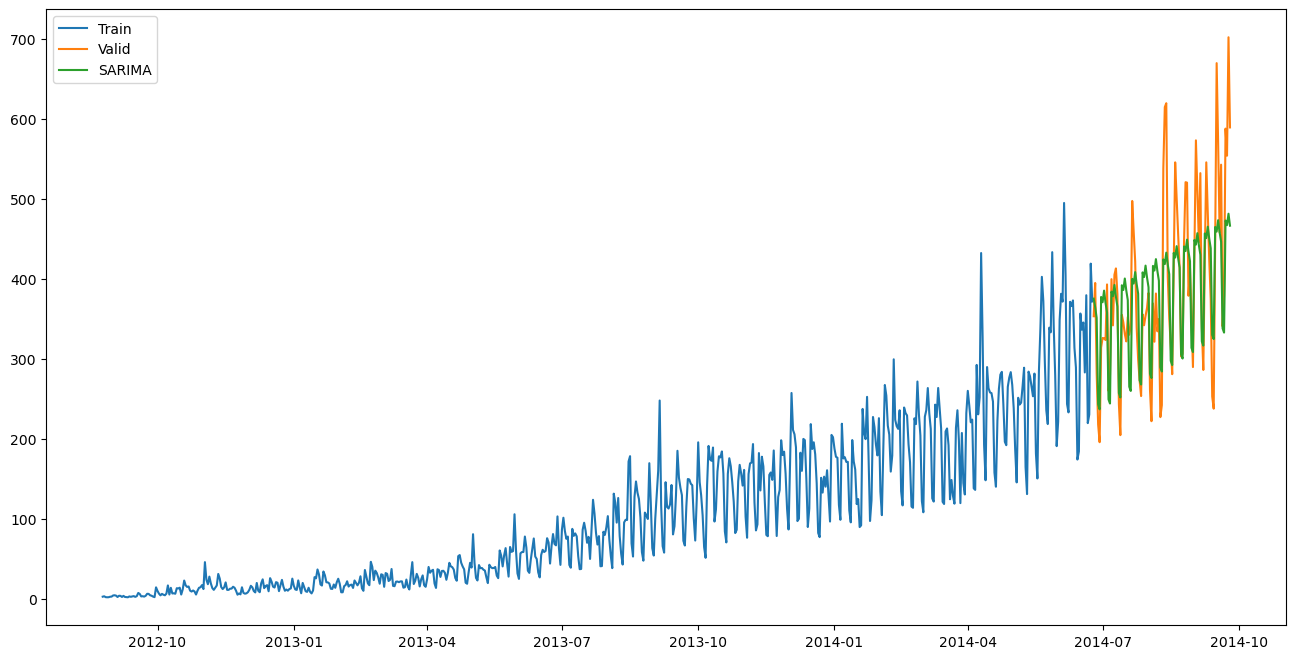

In [421]:
import statsmodels.api as sm
y_hat_avg=valid.copy()
fit1=sm.tsa.statespace.SARIMAX(Train.Count,order=(2,1,4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA']=fit1.predict(start='2014-6-25',end='2014-9-25',dynamic=True)
plt.figure(figsize=(16,8))
plt.plot(Train['Count'],label='Train')
plt.plot(valid['Count'],label='Valid')
plt.plot(y_hat_avg['SARIMA'],label='SARIMA')
plt.legend(loc='best')
plt.show()

In [422]:
rms = sqrt(mean_squared_error(valid.Count,y_hat_avg.SARIMA))
print(rms)

69.7389052119599


In [423]:
predict=fit1.predict(start='2014-9-26',end='2015-4-26',dynamic=True)

C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2473: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [424]:
test['prediction']=predict

#Merge test and test_original on day, month and year
merge=pd.merge(test,test_original,on=('day','month','year'),how='left')
merge['Hour']=merge['Hour_y']
merge['ID']=merge['ID_y']
merge=merge.drop(['Datetime_x','year','month','Hour_x','Hour_y','ID_x','ID_y'],axis=1)

#predicting by merging merge and temp2
prediction=pd.merge(merge,temp2,on=('Hour'),how='left')

#converting to the ratio to the original scale
prediction['Count']=prediction['prediction']*prediction['ratio']*24

submission=prediction.drop(['day','prediction','Datetime_y','Hour','ratio'],axis=1)
pd.DataFrame(submission,columns=['ID','Count']).to_csv('SARIMAX.csv')